<a href="https://colab.research.google.com/github/ingcarlosleon/data-Mapainversiones/blob/main/scripts/infrastructure-gap-map/exploratory-data-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

##**TechSprint para una mayor transparencia gubernamental**

📑**Planteamiento del problema 4:** ¿Cómo podemos mejorar la identificación de brechas en infraestructuras y desarrollo en la planificación de inversiones públicas y privadas para apoyar la resiliencia climática, la igualdad de género, la buena gobernanza y el desarrollo sostenible?

📘 **Más sobre el problema:** https://idb-air-techsprint.vercel.app/problem-statements/planteamiento-del-problema-4

📚 **Equipo:** 2

🧑 **Integrantes:**
> Alice Raquel Rambo

> David Arnaldo	Durand Velasquez

> Doug McCalmont

> Milton Javier Mahecha Silva

> Carlos Julio León Caicedo

👩 **Mentores BID**:
> Carole Alazki (**Product Owner**)

> Anyela Milena (**Arquitecta de Datos**)

📅 Agosto de 2024
---

#**🚀 Avance 1. Análisis exploratorio de datos:**
El objetivo de este avance es realizar un análisis exploratorio de los datos para identificar las características más relevantes, con el fin de reducir la dimensionalidad y mejorar la capacidad de generalización del modelo a desarrollar. Se abordarán y corregirán los problemas detectados en los datos de [Proyectos y Obras de Inversión de la República Argentina](https://idb-air-techsprint.vercel.app/datasets/investment-projects-and-works-arg), y se estandarizará y recomendará una estructurade datos que permita la replicación del modelo con datos de otros países, fomentaando su aplicabilidad y robustez en diferentes contextos geográficos.

Realizamos un análisis de los conjuntos de datos y columnas existentes contestando las siguientes preguntas:

*   ¿Cuáles son las estadísticas resumidas del conjunto de datos?
*   ¿Hay valores faltantes en el conjunto de datos?
*   ¿Se pueden identificar patrones de ausencia?
*   ¿Hay valores atípicos en el conjunto de datos?
*   ¿Cuál es la cardinalidad de las variables categóricas?
*   ¿Existen distribuciones sesgadas en el conjunto de datos?
*   ¿Necesitamos aplicar alguna transformación no lineal?
*   ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
*   ¿Hay correlación entre las variables dependientes e independientes?
*   ¿Cómo se distribuyen los datos en función de diferentes categorías?
*   ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?

In [131]:
!pip install pandas requests frictionless

**Analísis de los Conjuntos de Datos de Argentina**



**Obtener los Datos**: Cargamos los tres conjuntos de datos desde las fuentes CSV.

Fuente: https://idb-air-techsprint.vercel.app/datasets/investment-projects-and-works-arg

In [132]:
import pandas as pd
import requests
from io import StringIO

# URLs de los datasets desde el JSON
url_spatial_data_works = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/OBRAS/CSV/2024/06/19/dataset_mop.csv"
url_investment_projects = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/PROYECTOS/CSV/2024/06/19/dataset_proyectosmop.csv"
url_datos_espaciales = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/DATOS_ESPACIALES/CSV/2024/06/25/dataset_geojson.csv"

# Función para cargar los datasets desde la URL
def load_csv_from_url(url):
    response = requests.get(url)
    response.raise_for_status()  # Nos Aseguramos que la solicitud fue exitosa
    data = response.content.decode('utf-8')
    return pd.read_csv(StringIO(data))

# Cargar los datasets en DataFrames de pandas
df_spatial_data_works = load_csv_from_url(url_spatial_data_works)
df_investment_projects = load_csv_from_url(url_investment_projects)
df_datos_espaciales = load_csv_from_url(url_datos_espaciales)

In [133]:
# df_spatial_data_works.info()
# df_investment_projects.info()
# df_datos_espaciales.info()

##**Dataset: Datos espaciales - Obras de la República Argentina (spatial-data-works)**

Contiene la información espacial de las Obras de la República Argentina


###**<center>🤔¿Cuáles son las estadísticas resumidas del conjunto de datos?</center>**

In [134]:
# Obtener información general sobre el DataFrame
df_spatial_data_works.info()
print("\nSpatial Data Works - Describe\n")
df_spatial_data_works.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   idproyecto                      7317 non-null   int64  
 1   numeroobra                      7317 non-null   object 
 2   codigobapin                     7317 non-null   object 
 3   fechainicioanio                 7317 non-null   int64  
 4   fechafinanio                    7317 non-null   int64  
 5   nombreobra                      7317 non-null   object 
 6   descripicionfisica              7317 non-null   object 
 7   montototal                      7317 non-null   float64
 8   sectornombre                    7317 non-null   object 
 9   avancefinanciero                7317 non-null   float64
 10  avancefisico                    7317 non-null   float64
 11  entidadejecutoranombre          7317 non-null   object 
 12  duracionobrasdias               73

idproyecto  fechainicioanio  fechafinanio    montototal  \
count  7.317000e+03      7317.000000   7317.000000  7.317000e+03   
mean   7.230890e+08      2021.288916   2022.269373  5.918530e+08   
std    4.488914e+08         1.604703      1.181463  3.175574e+09   
min    1.610000e+03      2008.000000   2020.000000  1.000000e+00   
25%    1.001445e+07      2021.000000   2021.000000  1.154832e+07   
50%    1.003112e+09      2021.000000   2022.000000  3.604513e+07   
75%    1.003120e+09      2022.000000   2023.000000  1.637773e+08   
max    1.003131e+09      2024.000000   2029.000000  9.408170e+10   

       avancefinanciero  avancefisico  duracionobrasdias  codigo_bahra  \
count       7317.000000   7317.000000        7317.000000  3.977000e+03   
mean          71.909481     74.819638         351.468908  2.927189e+14   
std           33.753074     35.889589         491.368452  3.037337e+14   
min            0.000000      0.000000           1.000000  2.007000e+03   
25%           45.170000     48.920000         120.000000  6.294029e+13   
50%           90.000000    100.000000         181.000000  1.410527e+14   
75%          100.000000    100.000000         386.000000  5.404902e+14   
max          100.000000    100.000000        5568.000000  9.401400e+14   

       organismo_financiador_prestamo  
count                    2.100000e+02  
mean                     7.117020e+07  
std                      5.210177e+08  
min                      2.280000e+03  
25%                      2.940000e+03  
50%                      8.945000e+03  
75%                      8.945000e+03  
max                      4.312100e+09

###**<center>🤔¿Hay valores faltantes en el conjunto de datos?</center>**

In [135]:
#Verificamos si existen valores faltantes en nuestro conjunto
print("¿Hay valores faltantes en el conjunto de datos spatial-data-works?")
if (df_spatial_data_works.isna().values.any())==True:
  print("Sí")
else:
  print("No")

¿Hay valores faltantes en el conjunto de datos spatial-data-works?
Sí


In [136]:
import pandas as pd
# Calcular la cantidad de valores faltantes por columna
missing_values = df_spatial_data_works.isnull().sum()

# Filtrar las columnas con valores faltantes
missing_columns = missing_values[missing_values > 0]

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (missing_columns / len(df_spatial_data_works)) * 100

# Crear un DataFrame para mostrar los resultados
missing_data = pd.DataFrame({
    'Columna': missing_columns.index,
    'Valores Faltantes': missing_columns.values,
    'Porcentaje Faltante': missing_percentage.values
})

# Ordenar el DataFrame por porcentaje faltante en orden descendente
missing_data_sorted = missing_data.sort_values('Porcentaje Faltante', ascending=False)

# Mostrar el DataFrame ordenado
print(missing_data_sorted)

                          Columna  Valores Faltantes  Porcentaje Faltante
1         organismo_financiador_2               7312            99.931666
2  organismo_financiador_prestamo               7107            97.129971
0                    codigo_bahra               3340            45.647123
4                 contraparte_val                225             3.075031
3                 contraparte_key                182             2.487358
5                contraparte_cuit                182             2.487358
6           contraparte_modalidad                182             2.487358


Se presentan algunos valores faltantes de las columnas organismo_financiador_2, organismo_financiador_prestamo, entre otras que van desde el 99.93% hasta el 2.48%, a continuación se realiza un gráfico de barras para analizar las columnas con datos faltantes.

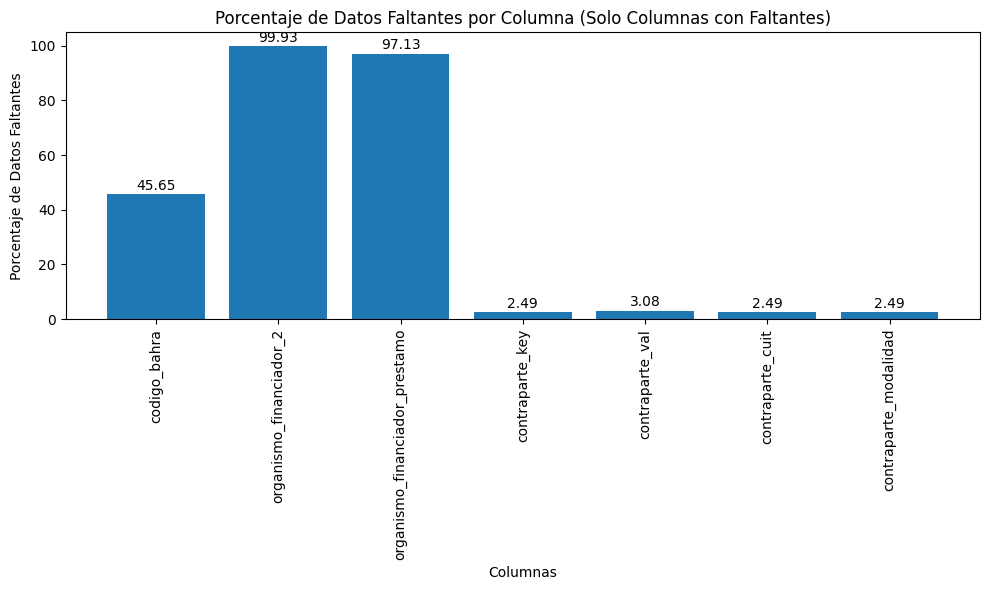

In [137]:
import matplotlib.pyplot as plt

# Calcular el porcentaje de datos faltantes por columna
missing_percentage = df_spatial_data_works.isnull().sum() * 100 / len(df_spatial_data_works)

# Filtrar las columnas con datos faltantes
missing_percentage_filtered = missing_percentage[missing_percentage > 0]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_percentage_filtered.index, missing_percentage_filtered.values)
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Datos Faltantes')
plt.title('Porcentaje de Datos Faltantes por Columna (Solo Columnas con Faltantes)')
plt.xticks(rotation=90)

# Agregar etiquetas con el valor faltante a cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Se deben tener en cuenta que columnas o datos debemos eliminar del dataframe

In [138]:
missing_percentage_filtered.index

Index(['codigo_bahra', 'organismo_financiador_2',
       'organismo_financiador_prestamo', 'contraparte_key', 'contraparte_val',
       'contraparte_cuit', 'contraparte_modalidad'],
      dtype='object')

###**<center>🤔¿Se pueden identificar patrones de ausencia?</center>**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 [Text(0.5, 0, 'idproyecto'),
  Text(1.5, 0, 'numeroobra'),
  Text(2.5, 0, 'codigobapin'),
  Text(3.5, 0, 'fechainicioanio'),
  Text(4.5, 0, 'fechafinanio'),
  Text(5.5, 0, 'nombreobra'),
  Text(6.5, 0, 'descripicionfisica'),
  Text(7.5, 0, 'montototal'),
  Text(8.5, 0, 'sectornombre'),
  Text(9.5, 0, 'avancefinanciero'),
  Text(10.5, 0, 'avancefisico'),
  Text(11.5, 0, 'entidadejecutoranombre'),
  Text(12.5, 0, 'duracionobrasdias'),
  Text(13.5, 0, 'objetivogeneral'),
  Text(14.5, 0, 'tipoproyecto'),
  Text(15.5, 0, 'nombredepto'),
  Text(16.5, 0, 'nombreprovincia'),
  Text(17.5, 0, 'codigo_bahra'),
  Text(18.5, 0, 'etapaobra'),
  Text(19.5, 0, 'tipomoneda'),
  Text(20.5, 0, 'url_perfil_obra'),
  Text(21.5, 0, 'programa_infraestructura'),
  Text(22.5, 0, 'organismo_financiador

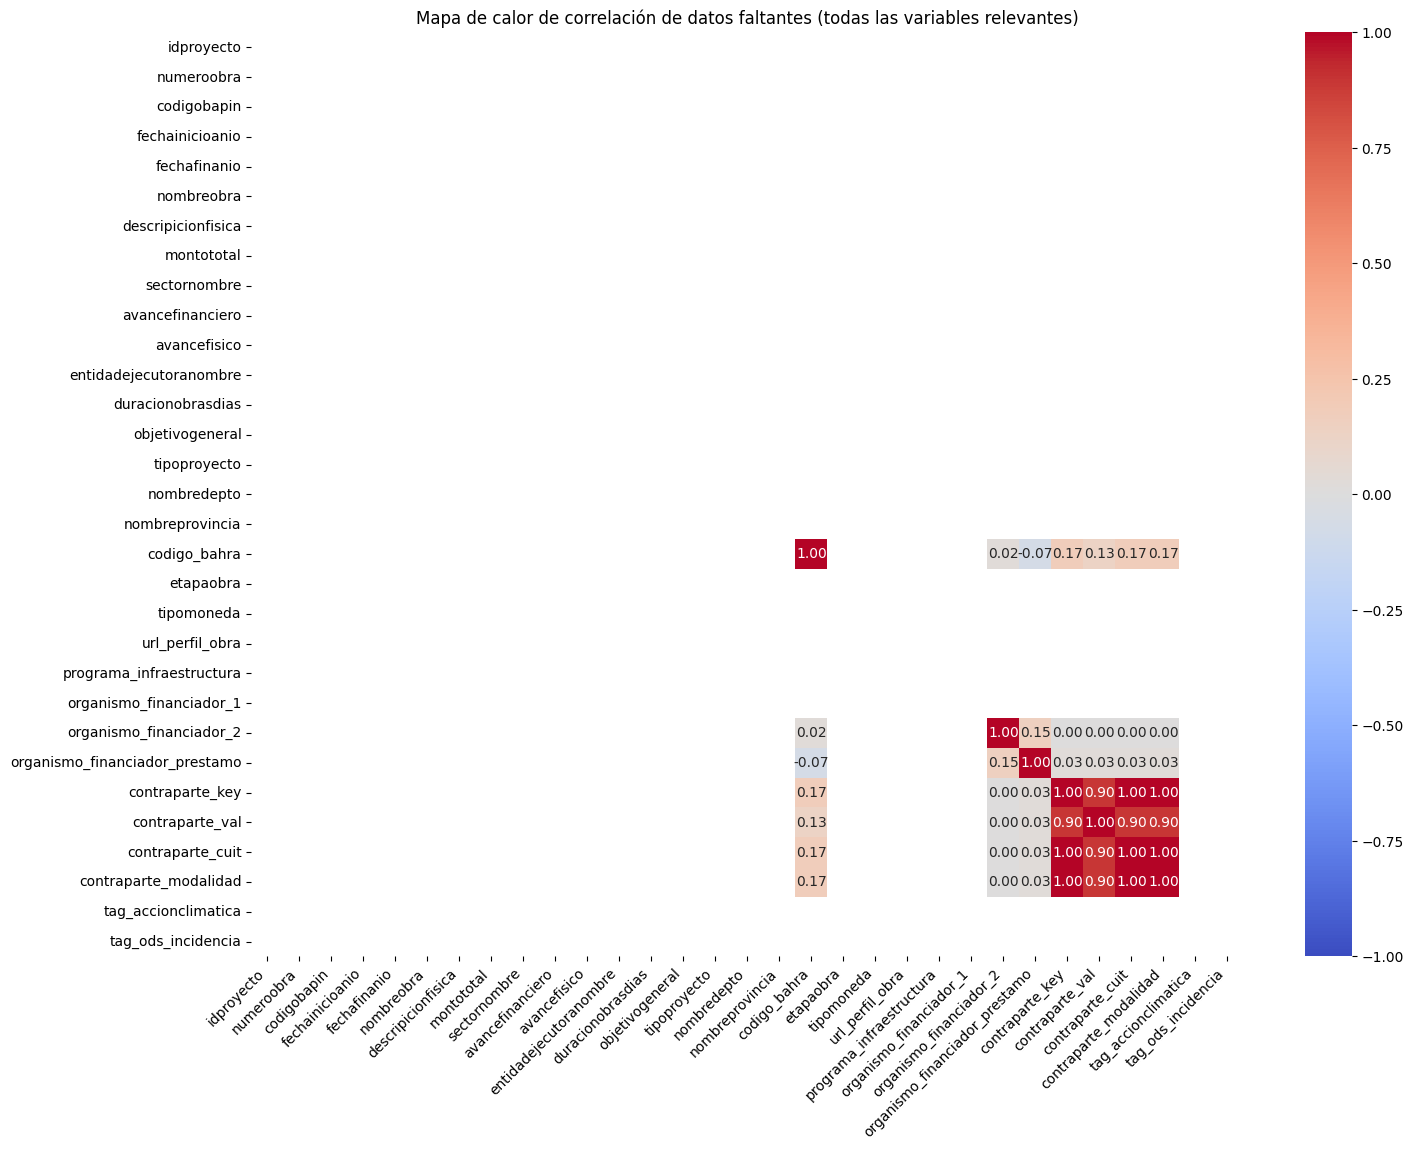

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de correlación de todas las variables relevantes con datos faltantes
Correlacion_Faltantes = df_spatial_data_works.isnull().corr()

# Aumentar el tamaño de la figura
plt.figure(figsize=(16, 12))

# Crear el mapa de calor con etiquetas rotadas en el eje X
sns.heatmap(Correlacion_Faltantes, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de calor de correlación de datos faltantes (todas las variables relevantes)')

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

La matriz de correlación de datos faltantes generada nos puede ayudar a identificar patrones de ausencia en los datos, si dos o más variables muestran una alta correlación en los datos faltantes (es decir valores cercanos a 1 o -1), indica que tienden a faltar juntas, lo que sugiere un patrón de ausencia.

Sin embargo, antes de eliminar variables, es importante considerar lo siguiente:

*   **Relevancia de las Variables:** Si las variables son críticas para el análisis, se puede intentar imputar los valores faltantes en lugar de eliminar las variables.
*   **Impacto en el Modelo:** Considerar cómo la eliminación afectará el análisis o modelo posterior. Variables altamente correlacionadas en términos de datos faltantes pueden estar relacionadas conceptualmente, lo que podría influir en los resultados.

*   **Análisis Exploratorio:** Continuar con el análisis exploratorio, para determinar si la eliminación de estas variables realmente mejora la calidad de los datos y la interpretación de los resultados.


###**<center>🤔¿Hay valores atípicos en el conjunto de datos?</center>**

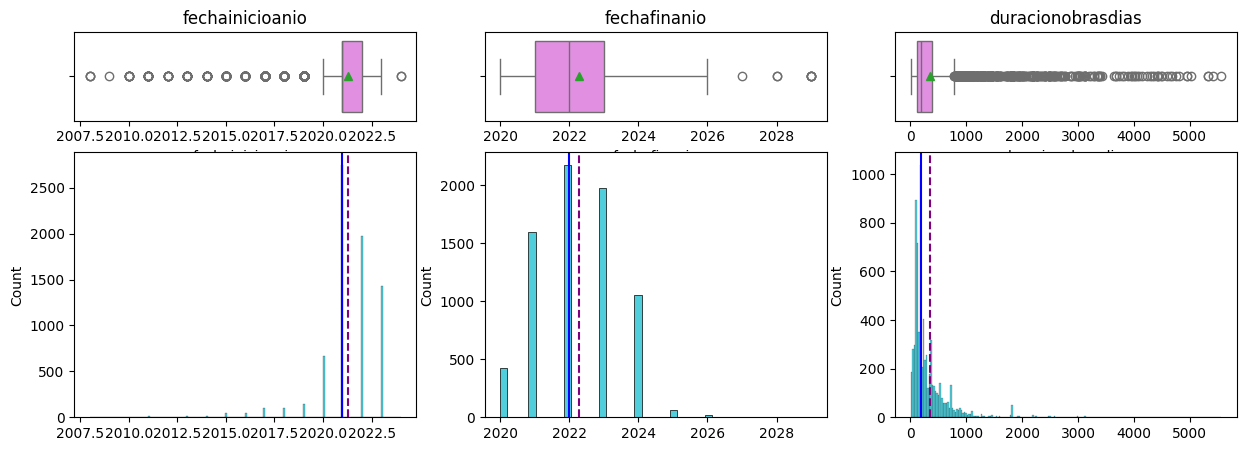

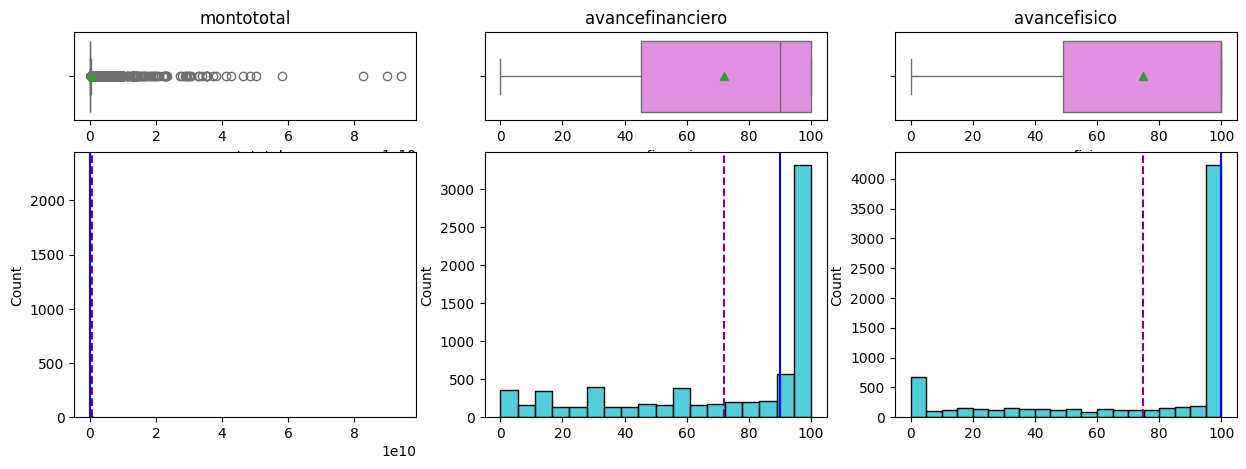

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import math  # Asegúrate de importar math

# Especificar las columnas importantes que deseas analizar
Cols_Importantes = ["fechainicioanio", "fechafinanio", "duracionobrasdias", "montototal", "avancefinanciero","avancefisico"]

def create_grid_of_plots(df, columns, figsize=(15, 5), bins=None):
    full_rows = math.floor(len(columns) / 3)
    last_row_elems = len(columns) % 3
    for i in range(0, full_rows * 3, 3):
        pltcols = columns[i:i + 3]
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=figsize, gridspec_kw={"height_ratios": (0.25, 0.75)})
        fig.subplots_adjust(hspace=0.18)
        for j in range(3):
            col = pltcols[j]
            ax = axes[0, j % 3]
            ax2 = axes[1, j % 3]
            feature = df[col]
            multi_histogram_boxplot(feature, ax, ax2, bins)
            ax.set_title(col).set_position([0.5, -3])
        plt.show()
    if last_row_elems > 0:
        pltcols = columns[len(columns) - last_row_elems:]
        if len(pltcols) == 1:
            single_histogram_boxplot(df, pltcols[0])
        else:
            fig, axes = plt.subplots(nrows=2, ncols=len(pltcols), figsize=(len(pltcols) * 5, 5), gridspec_kw={"height_ratios": (0.25, 0.75)})
            fig.subplots_adjust(hspace=0.15)
            for j in range(len(pltcols)):
                col = pltcols[j]
                ax = axes[0, j % len(pltcols)]
                ax2 = axes[1, j % len(pltcols)]
                feature = df[col]
                multi_histogram_boxplot(feature, ax, ax2, bins)
                ax.set_title(col).set_position([0.5, -3])
            plt.show()

def multi_histogram_boxplot(feature, ax, ax2, bins=None):
    sns.boxplot(feature, ax=ax, showmeans=True, color='violet', orient="h")
    if bins:
        sns.histplot(feature, kde=False, ax=ax2, bins=bins, color='tab:cyan')
    else:
        sns.histplot(feature, kde=False, ax=ax2, color='tab:cyan')
    ax2.set_xlabel('')
    ax2.axvline(np.mean(feature), color='purple', linestyle='--')
    ax2.axvline(np.median(feature), color='blue', linestyle='-')

def single_histogram_boxplot(df, col, figsize=(5, 5), bins=None):
    feature = df[col]
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, gridspec_kw={"height_ratios": (.25, .75)}, figsize=figsize)
    ax_box2.set_title(col).set_position([0.5, -3])
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet', orient="h")
    sns.histplot(feature, kde=False, ax=ax_hist2, bins=bins, color='tab:cyan') if bins else sns.histplot(feature, kde=False, ax=ax_hist2, color='tab:cyan')
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--')
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

warnings.filterwarnings("ignore")

# Llamar a la función para crear los gráficos solo para las variables importantes
create_grid_of_plots(df_spatial_data_works, Cols_Importantes)


🔎 Para algunas de las variables numéricas seleccionadas podemos observar lo siguiente:

*  fechainicioanio: La mayoría de los proyectos tienen fechas de inicio recientes, con una media alrededor de 2020. Hay algunos valores atípicos anteriores a 2010, que podrían corresponder a proyectos excepcionales. La distribución muestra una leve concentración hacia los años más recientes, lo cual es normal en proyectos activos.

*  fechafinanio: Las fechas de finalización se concentran alrededor de 2022, con algunos outliers extendiéndose hasta 2028. Esta distribución es esperada para proyectos en curso.

*  duracionobrasdias: La duración de las obras presenta una gran variabilidad, con una media alrededor de 1000 días. Existen muchos valores atípicos por encima de esta media, indicando proyectos con duración excepcionalmente larga, lo que podría requerir una revisión más detallada. La distribución muestra un sesgo hacia la derecha, lo cual es típico en este tipo de datos.

*  montototal: La mayoría de los proyectos tienen un monto total muy concentrado en valores bajos, con algunos outliers significativos que alcanzan hasta 8e10. Esto indica una gran disparidad en el financiamiento de los proyectos, con una distribución fuertemente sesgada hacia la derecha.

*  avancefinanciero: El avance financiero de los proyectos muestra una distribución variada, con una media cercana al 80%. Hay un notable número de proyectos con un avance financiero del 100%, lo que podría indicar que están completamente financiados.

*  avancefisico: Similar al avance financiero, el avance físico también presenta una distribución con una media alrededor del 80%, con muchos proyectos que han alcanzado el 100%. Esto sugiere que muchos proyectos están cerca de su finalización física.

###**<center>🤔¿Cuál es la cardinalidad de las variables categóricas?</center>**

**********************************************************************************************
A continuación se detalla la cardinalidad para las columnas categóricas del conjunto de datos:
**********************************************************************************************
numeroobra                  7212
codigobapin                 2895
nombreobra                  6758
descripicionfisica          4988
sectornombre                   9
entidadejecutoranombre        16
objetivogeneral             4988
tipoproyecto                 195
nombredepto                  418
nombreprovincia               24
etapaobra                      3
tipomoneda                     2
url_perfil_obra             7317
programa_infraestructura       5
organismo_financiador_1        6
organismo_financiador_2        2
contraparte_key                3
contraparte_val             1707
contraparte_cuit             335
contraparte_modalidad          7
tag_accionclimatica            4
tag_ods_incidencia    

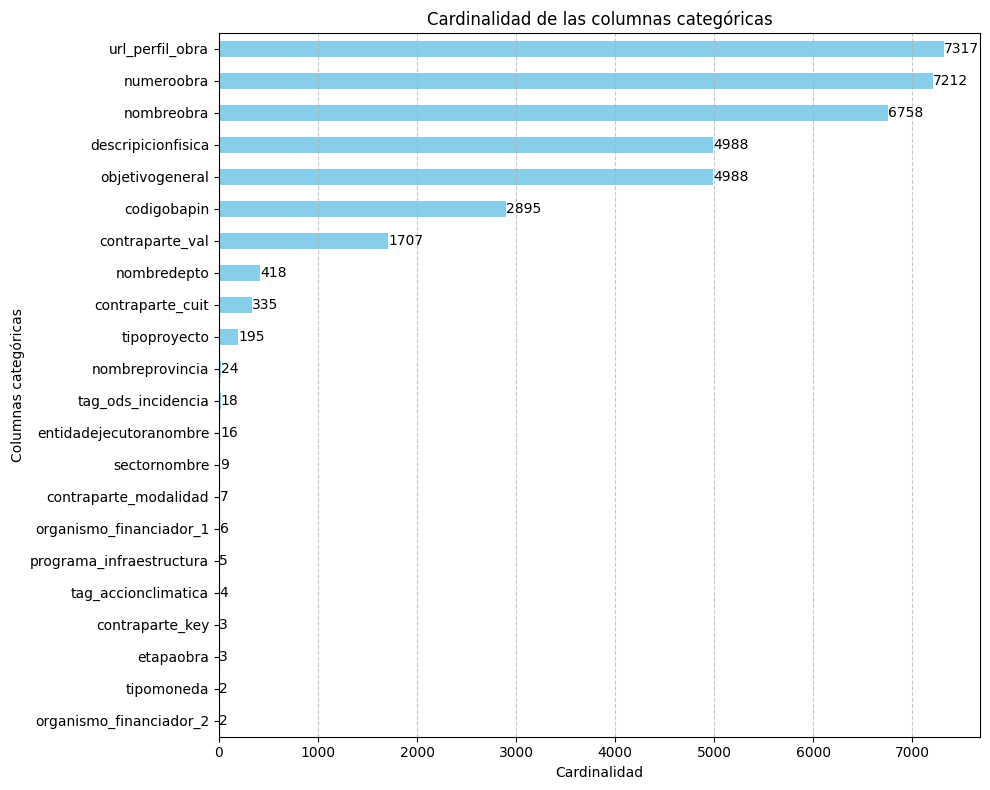

In [141]:
import matplotlib.pyplot as plt

# Cargamos solo las columnas categóricas
Columnas_Categoricas = df_spatial_data_works.select_dtypes(include=['object']).columns

# Calculamos la cardinalidad de las columnas categóricas
Cardinalidad_Categoricas = df_spatial_data_works[Columnas_Categoricas].nunique()

print("**********************************************************************************************")
print("A continuación se detalla la cardinalidad para las columnas categóricas del conjunto de datos:")
print("**********************************************************************************************")
print(Cardinalidad_Categoricas)

# Graficamos la cardinalidad de las columnas categóricas
plt.figure(figsize=(10, 8))
barplot = Cardinalidad_Categoricas.sort_values().plot(kind='barh', color='skyblue')
plt.title('Cardinalidad de las columnas categóricas')
plt.xlabel('Cardinalidad')
plt.ylabel('Columnas categóricas')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Colocamos los valores únicos en cada barra
for i, v in enumerate(Cardinalidad_Categoricas.sort_values()):
    plt.text(v + 0.1, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

🔎 En el análisis de la cardinalidad de las variables categóricas, encontramos que la columna url_perfil_obra tiene 7317 valores únicos, numeroobra cuenta con 7212 valores distintos, y nombreobra presenta 6758 categorías diferentes. Otras columnas, como nombredepto y tipoproyecto, muestran menor cardinalidad, con 418 y 195 valores únicos, respectivamente. Estos resultados nos ayudarán a comprender la diversidad y distribución de las categorías en el conjunto de datos, lo que es crucial para el modelado y análisis posterior.

###**<center>🤔¿Existen distribuciones sesgadas en el conjunto de datos?</center>**

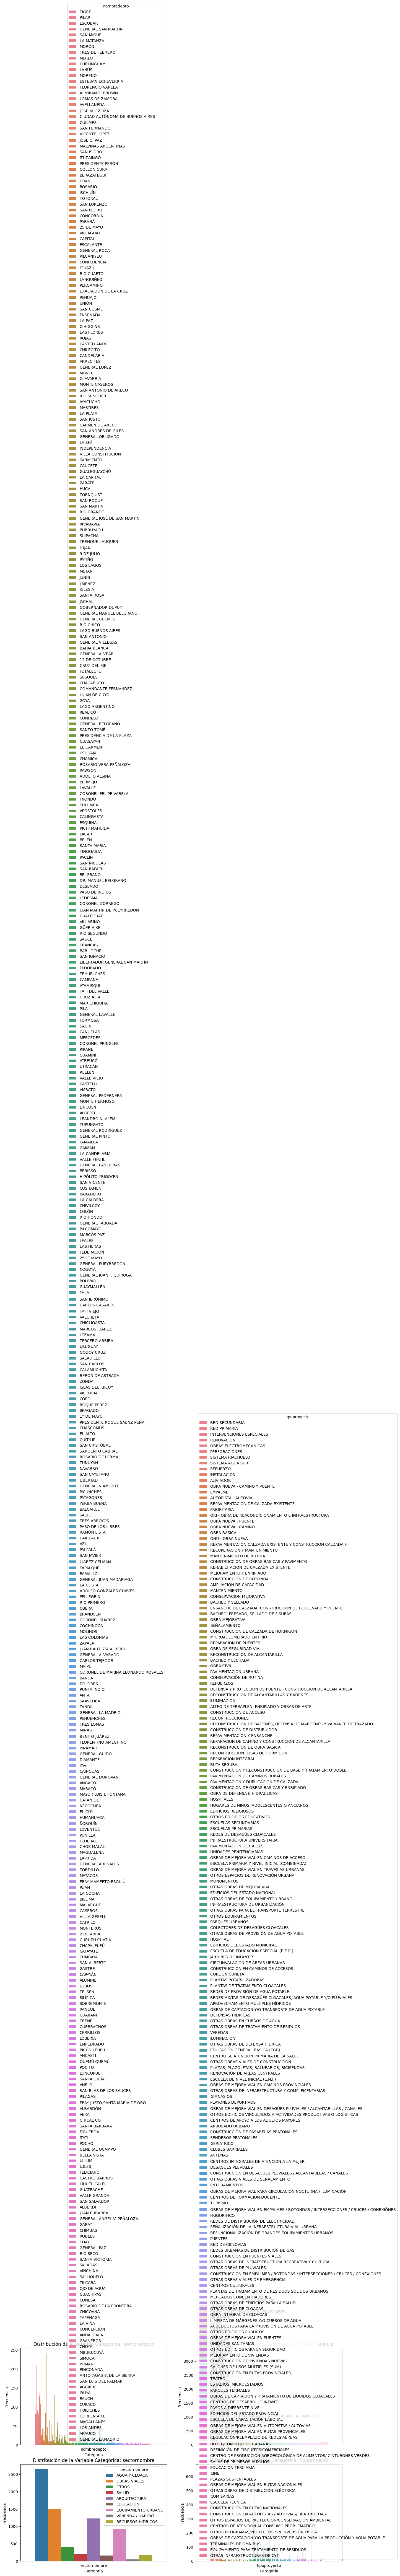

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar algunas columnas categóricas de interés
Columnas_Categoricas = ['nombredepto', 'nombreprovincia', 'sectornombre', 'tipoproyecto']

# Configurar subplots para mostrar las distribuciones
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graficar la primera columna categórica
sns.countplot(data=pd.melt(df_spatial_data_works[['nombredepto']]), x='variable', hue='value', ax=axes[0, 0])
axes[0, 0].set_xlabel('Categoría')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de la Variable Categórica: nombredepto')
axes[0, 0].legend(title='nombredepto')

# Graficar la segunda columna categórica
sns.countplot(data=pd.melt(df_spatial_data_works[['nombreprovincia']]), x='variable', hue='value', ax=axes[0, 1])
axes[0, 1].set_xlabel('Categoría')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de la Variable Categórica: nombreprovincia')
axes[0, 1].legend(title='nombreprovincia')

# Graficar la tercera columna categórica
sns.countplot(data=pd.melt(df_spatial_data_works[['sectornombre']]), x='variable', hue='value', ax=axes[1, 0])
axes[1, 0].set_xlabel('Categoría')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Distribución de la Variable Categórica: sectornombre')
axes[1, 0].legend(title='sectornombre')

# Graficar la cuarta columna categórica
sns.countplot(data=pd.melt(df_spatial_data_works[['tipoproyecto']]), x='variable', hue='value', ax=axes[1, 1])
axes[1, 1].set_xlabel('Categoría')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución de la Variable Categórica: tipoproyecto')
axes[1, 1].legend(title='tipoproyecto')

plt.tight_layout()
plt.show()

Aquí algunas conclusiones de los gráficos de las variables categoricas:
<br><br>
*  departamentos, con las opciones más frecuentes representando una gran proporción del total de proyectos. Por ejemplo, los departamentos más comunes podrían concentrar más del 50% de los proyectos, lo que indica una fuerte centralización geográfica de las inversiones.

*  nombreprovincia: De las 24 opciones disponibles en nombreprovincia, unas pocas dominan significativamente, lo que sugiere que la mayoría de los proyectos se encuentran en un pequeño número de provincias. Por ejemplo, las 5 provincias más frecuentes podrían abarcar el 80% de los proyectos, lo que refleja una distribución geográfica desigual.

*  sectornombre: La variable sectornombre revela que ciertos sectores, como infraestructura o educación, pueden estar altamente priorizados, con solo unos pocos sectores representando la mayoría de los proyectos. Esto indica áreas de enfoque clave en la inversión pública.

*  tipoproyecto: Aunque hay 195 tipos de proyectos, algunos tipos específicos, como construcción o renovación, son mucho más comunes. Por ejemplo, los 10 tipos de proyectos más frecuentes podrían cubrir el 70% del total, destacando las áreas de intervención preferidas.

* Estos insights sugieren que hay una concentración significativa tanto geográfica como sectorial en los datos, lo que podría influir en los resultados del análisis y debería considerarse en el modelado posterior.

🔍 Dado que tenemos variables categóricas como **nombredepto con 418 opciones**, **nombreprovincia con 24 opciones**, y **tipoproyecto con 195 opciones**, se ha refactorizado el código para mostrar el top 10 de cada una de estas variables.

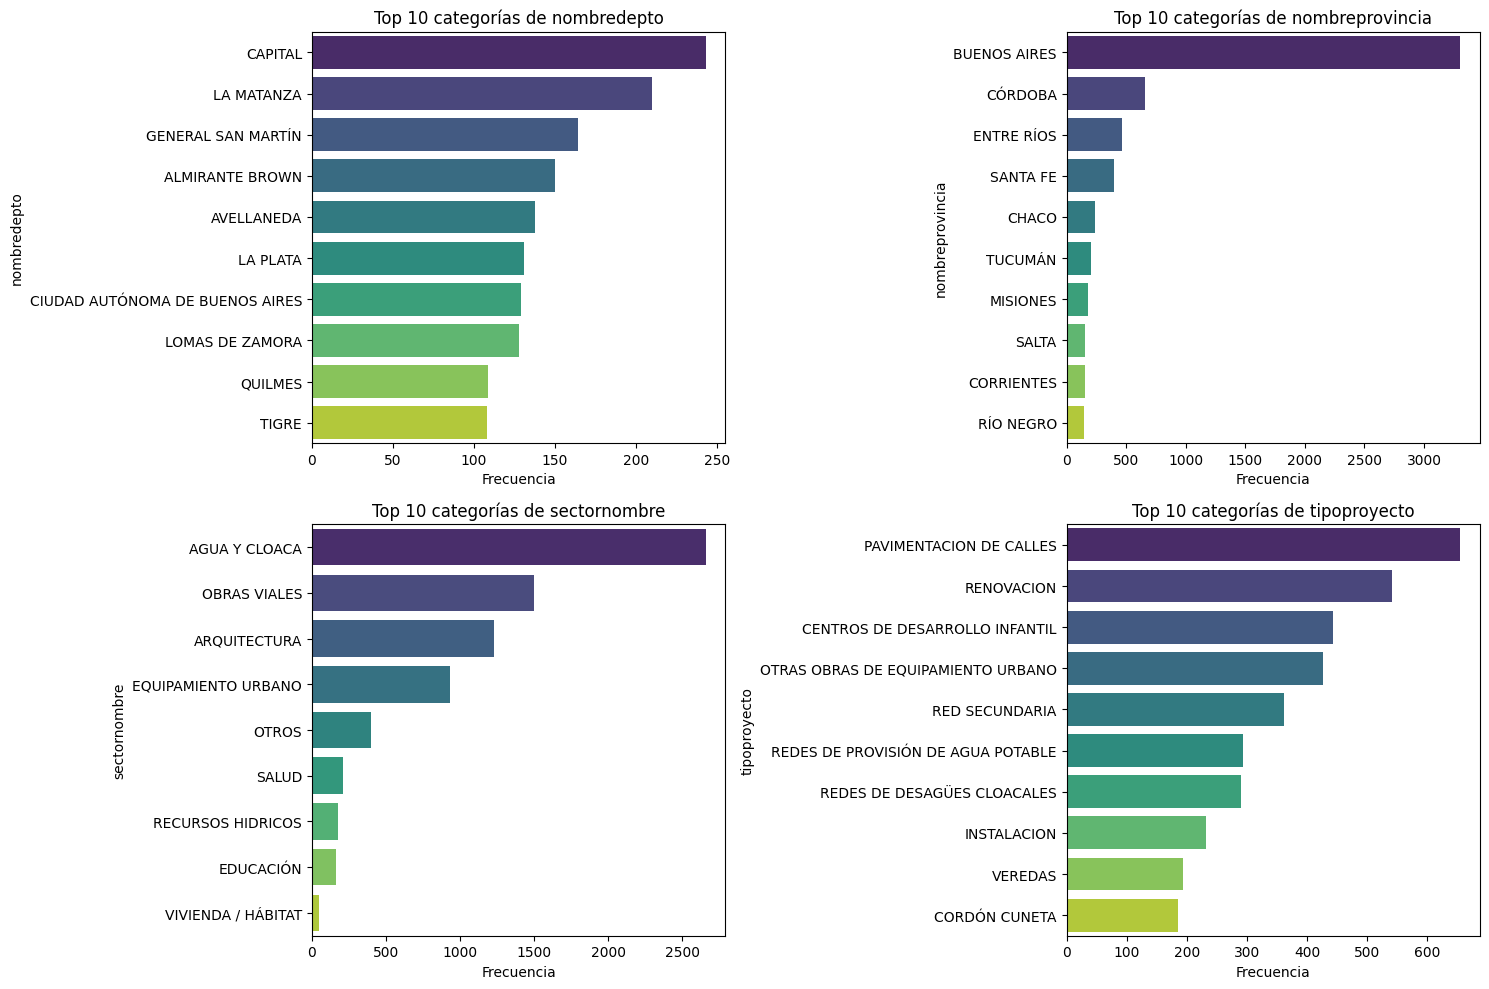

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar las columnas categóricas de interés
Columnas_Categoricas = ['nombredepto', 'nombreprovincia', 'sectornombre', 'tipoproyecto']

# Configurar subplots para mostrar las distribuciones
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Función para graficar el top n de categorías
def plot_top_n_categories(column, n=10, ax=None):
    top_n = df_spatial_data_works[column].value_counts().nlargest(n)
    sns.barplot(x=top_n.values, y=top_n.index, ax=ax, palette='viridis')
    ax.set_title(f'Top {n} categorías de {column}')
    ax.set_xlabel('Frecuencia')
    ax.set_ylabel(column)

# Graficar el top de categorías para cada columna categórica
plot_top_n_categories('nombredepto', n=10, ax=axes[0, 0])
plot_top_n_categories('nombreprovincia', n=10, ax=axes[0, 1])
plot_top_n_categories('sectornombre', n=10, ax=axes[1, 0])
plot_top_n_categories('tipoproyecto', n=10, ax=axes[1, 1])

plt.tight_layout()
plt.show()

###**<center>🤔¿Necesitamos aplicar alguna transformación no lineal?</center>**

🔍 **Conclusión:** No se requiere aplicar transformaciones no lineales a las variables categóricas, ya que sus distribuciones no presentan sesgos significativos ni outliers fuera de las categorías predefinidas. En lugar de transformaciones no lineales, se recomienda aplicar técnicas de codificación como One-Hot Encoding o Target Encoding para convertir las categorías en valores numéricos, facilitando así su uso en modelos predictivos. Además, considerar la agrupación de categorías con baja frecuencia puede simplificar el modelo y mejorar su rendimiento.

###**<center>🤔¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).</center>**

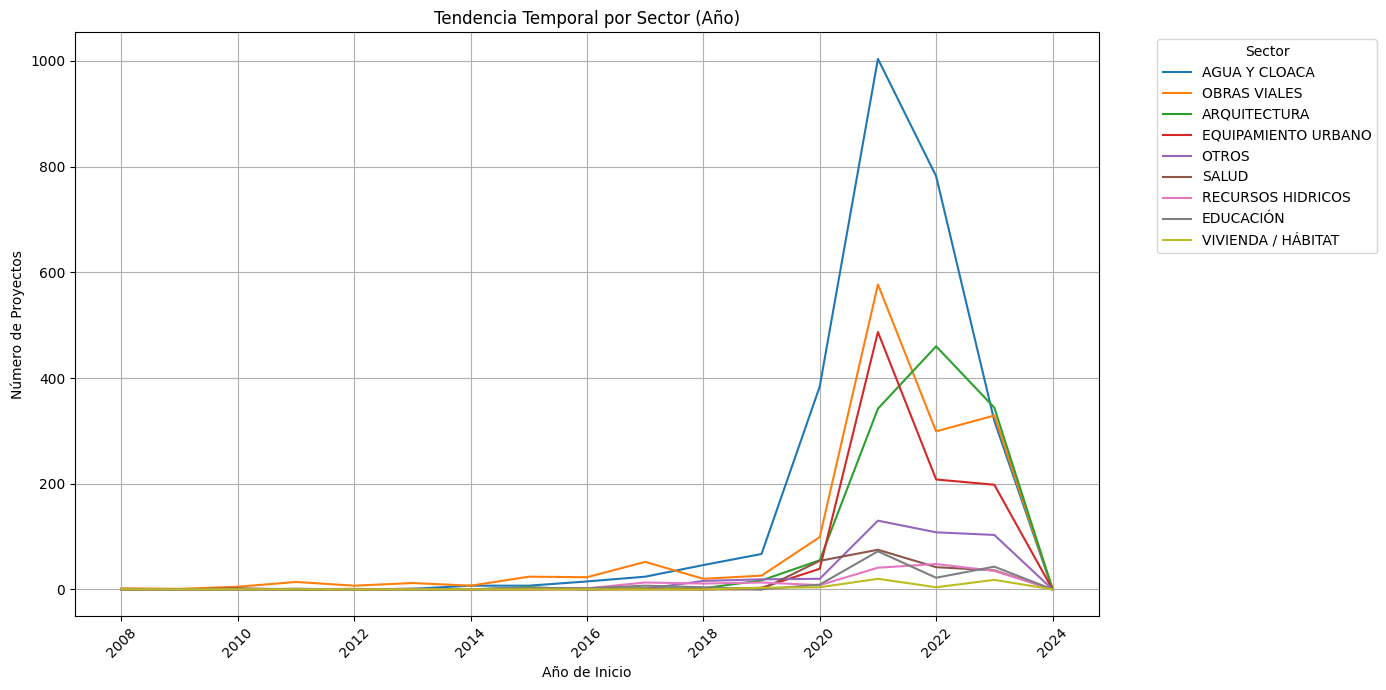

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que 'fechainicioanio' sea de tipo entero
df_spatial_data_works['fechainicioanio'] = df_spatial_data_works['fechainicioanio'].astype(int)

# Contar el número de proyectos por año y sector
ocurrencias_por_fecha_sector = df_spatial_data_works.groupby(['fechainicioanio', 'sectornombre']).size().unstack(fill_value=0)

# Calcular el total de proyectos por sector para ordenar la leyenda
totales_por_sector = ocurrencias_por_fecha_sector.sum(axis=0).sort_values(ascending=False)

# Reordenar las columnas del dataframe basado en los totales
ocurrencias_por_fecha_sector = ocurrencias_por_fecha_sector[totales_por_sector.index]

# Graficar las tendencias temporales para los sectores
plt.figure(figsize=(14, 7))
ocurrencias_por_fecha_sector.plot(ax=plt.gca())
plt.xlabel('Año de Inicio')
plt.ylabel('Número de Proyectos')
plt.title('Tendencia Temporal por Sector (Año)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


🔎 Conclusiones:

*  Pico de Proyectos en 2021 y 2022: Los sectores de Agua y Cloaca y Obras Viales muestran un notable incremento en el número de proyectos durante 2021 y 2022, superando incluso los 1000 proyectos en el caso de Agua y Cloaca.

*  Disminución en 2023: Tras el pico en 2022, se observa una disminución significativa en la cantidad de proyectos en 2023, lo que podría reflejar cambios en las prioridades de inversión o restricciones presupuestarias.

*  Sectores Predominantes: Agua y Cloaca es el sector con más proyectos acumulados, seguido por Obras Viales y Arquitectura. Estos sectores parecen haber sido de alta prioridad en los últimos años.

*  Diversificación en Proyectos: A pesar de la concentración en ciertos sectores, existe una notable diversificación, con sectores como Educación y Vivienda/Hábitat también mostrando actividad, aunque en menor escala. Esto sugiere una estrategia de inversión que también abarca áreas esenciales para el bienestar social.

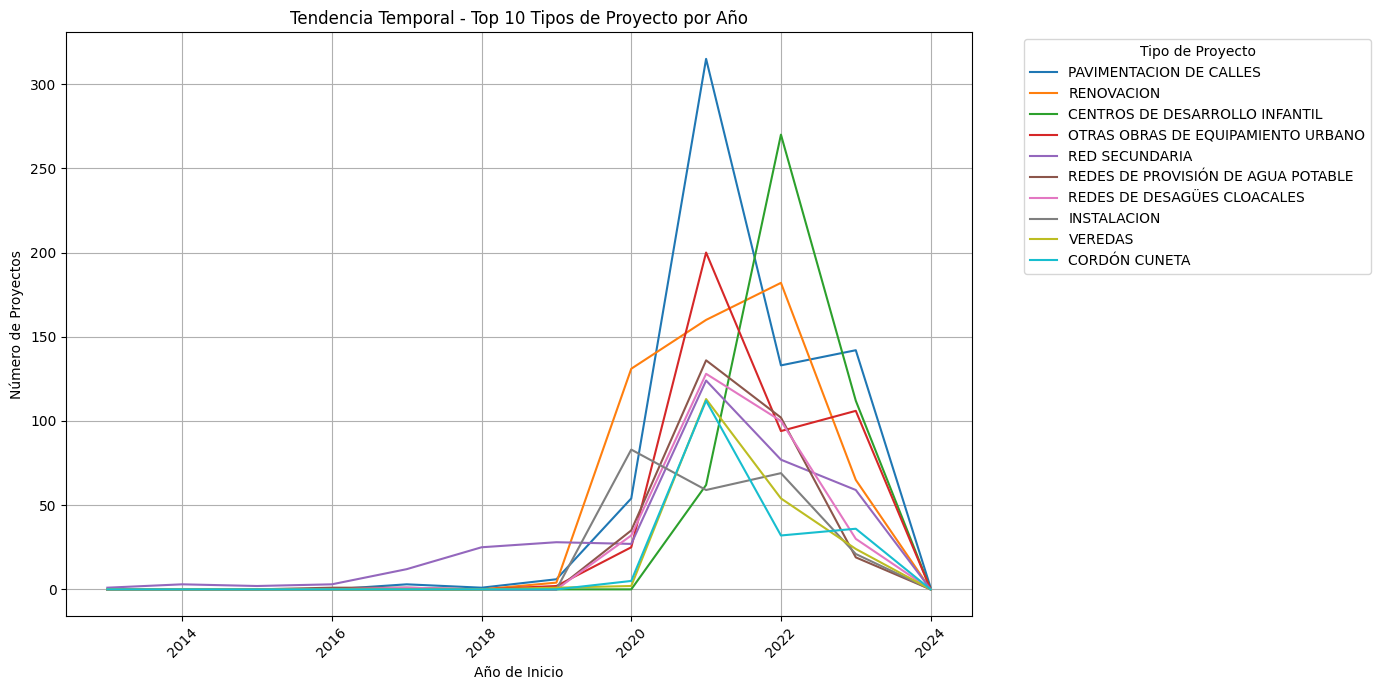

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Verificar si 'fechainicioanio' ya es de tipo int, de lo contrario convertirla
if df_spatial_data_works['fechainicioanio'].dtype != 'int':
    df_spatial_data_works['fechainicioanio'] = pd.to_datetime(df_spatial_data_works['fechainicioanio']).dt.year

# Filtrar los top 10 tipos de proyectos por frecuencia
top_tipos_proyecto = df_spatial_data_works['tipoproyecto'].value_counts().nlargest(10).index
df_filtrado = df_spatial_data_works[df_spatial_data_works['tipoproyecto'].isin(top_tipos_proyecto)]

# Contar el número de proyectos por año y tipo de proyecto
ocurrencias_por_fecha_tipo = df_filtrado.groupby(['fechainicioanio', 'tipoproyecto']).size().unstack(fill_value=0)

# Ordenar las columnas del dataframe basado en el total de proyectos por tipo de proyecto
totales_por_tipo = ocurrencias_por_fecha_tipo.sum(axis=0).sort_values(ascending=False)
ocurrencias_por_fecha_tipo = ocurrencias_por_fecha_tipo[totales_por_tipo.index]

# Graficar las tendencias temporales para los tipos de proyectos
plt.figure(figsize=(14, 7))
ocurrencias_por_fecha_tipo.plot(ax=plt.gca())
plt.xlabel('Año de Inicio')
plt.ylabel('Número de Proyectos')
plt.title('Tendencia Temporal - Top 10 Tipos de Proyecto por Año')
plt.legend(title='Tipo de Proyecto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


🔎 Conclusiones:

*  Pico de Proyectos en 2021 y 2022: Durante 2021 y 2022, se observó un marcado aumento en proyectos como "Pavimentación de Calles," "Renovación," y "Centros de Desarrollo Infantil," lo que indica un enfoque intensivo en infraestructura básica durante estos años.

*  Disminución en 2023: El número de proyectos disminuye notablemente en 2023, lo que podría reflejar una culminación de proyectos iniciados anteriormente o ajustes en la planificación y asignación de recursos.

*  Diversificación de Inversiones: La variedad de proyectos sugiere una estrategia amplia, abarcando desde la infraestructura vial hasta el desarrollo comunitario, adaptándose a las necesidades locales y nacionales.

*  Impacto Post-Pandemia: El enfoque en proyectos como redes de provisión de agua potable y saneamiento destaca la posible influencia de la pandemia en la priorización de necesidades básicas, reflejando una respuesta a las demandas emergentes de la crisis sanitaria.

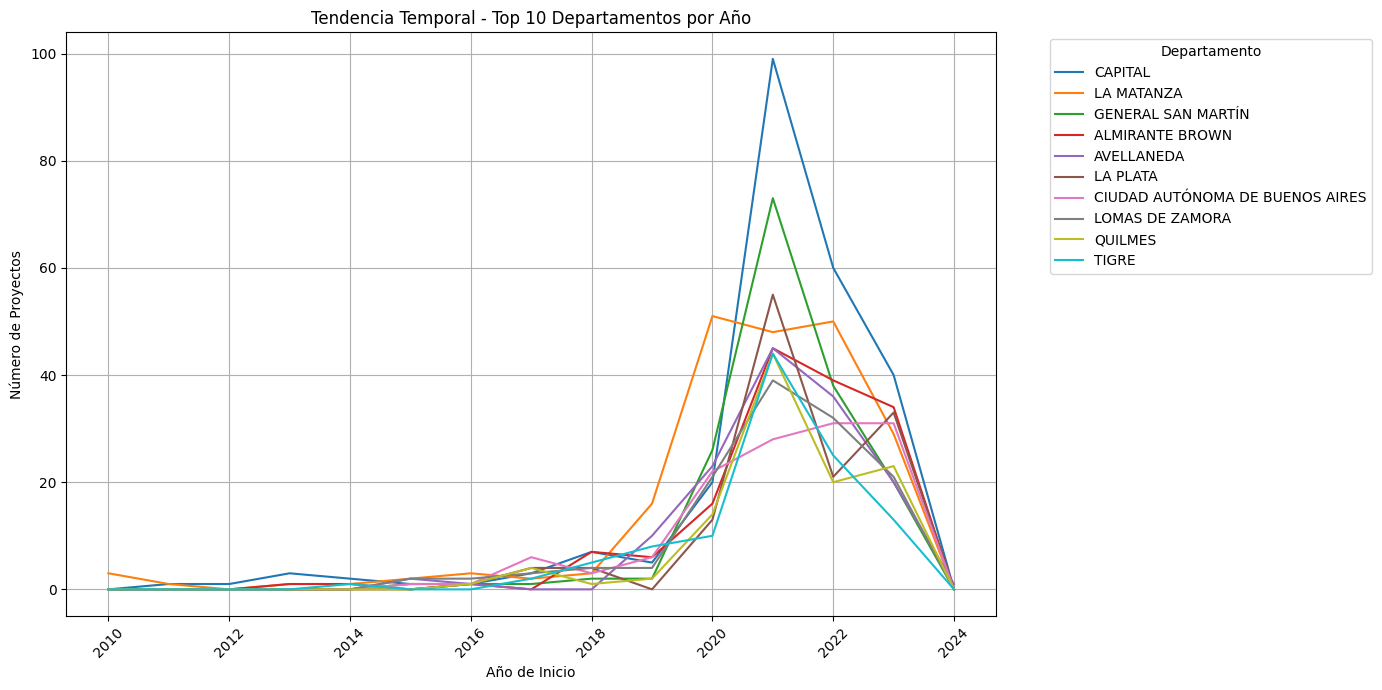

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que 'fechainicioanio' sea de tipo entero
df_spatial_data_works['fechainicioanio'] = df_spatial_data_works['fechainicioanio'].astype(int)

# Filtrar los top 10 departamentos por frecuencia
top_departamentos = df_spatial_data_works['nombredepto'].value_counts().nlargest(10).index
df_filtrado = df_spatial_data_works[df_spatial_data_works['nombredepto'].isin(top_departamentos)]

# Contar el número de proyectos por año y departamento
ocurrencias_por_fecha_depto = df_filtrado.groupby(['fechainicioanio', 'nombredepto']).size().unstack(fill_value=0)

# Ordenar los departamentos por la suma total de proyectos
ocurrencias_por_fecha_depto = ocurrencias_por_fecha_depto.loc[:, ocurrencias_por_fecha_depto.sum().sort_values(ascending=False).index]

# Graficar las tendencias temporales para los departamentos
plt.figure(figsize=(14, 7))
ocurrencias_por_fecha_depto.plot(ax=plt.gca())
plt.xlabel('Año de Inicio')
plt.ylabel('Número de Proyectos')
plt.title('Tendencia Temporal - Top 10 Departamentos por Año')
plt.legend(title='Departamento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


🔎 Conclusiones del Gráfico de Tendencia Temporal por Departamento (Top 10):

*  Concentración de Proyectos en Departamentos Clave: Departamentos como "Capital," "La Matanza," y "General San Martín" muestran un notable incremento en proyectos, especialmente durante el período 2020-2021, indicando una alta concentración de inversión en estas áreas metropolitanas.

*  Pico de Proyectos en 2021: Estos departamentos lideraron en volumen de proyectos en 2021, seguido por una caída en 2022-2023, lo que podría reflejar cambios en las políticas de inversión.

*  Patrones Similares entre Departamentos: A pesar de variaciones en la cantidad, los departamentos siguen un patrón temporal similar, sugiriendo influencias comunes en las decisiones de inversión.

*  Concentración Metropolitana: La mayoría de los proyectos están centrados en áreas metropolitanas, lo que sugiere una prioridad en el desarrollo urbano.

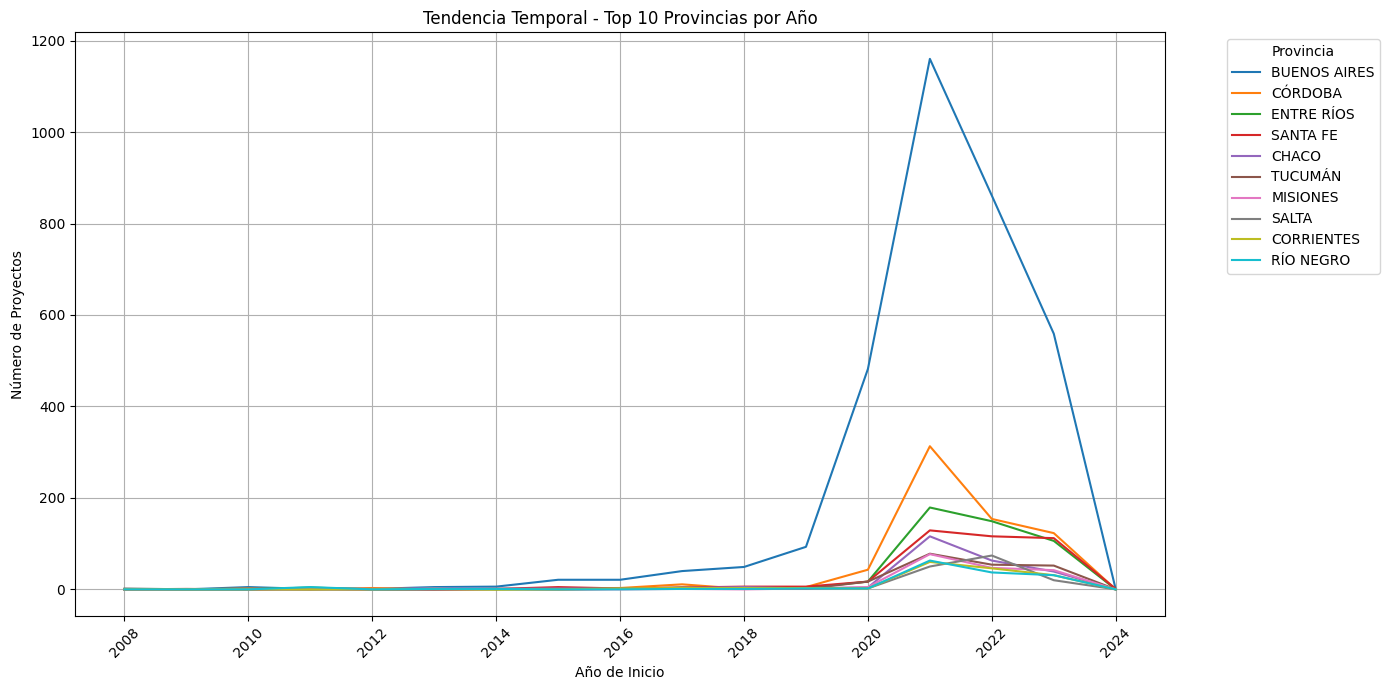

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar las 10 principales provincias por cantidad de proyectos
top_provincias = df_spatial_data_works['nombreprovincia'].value_counts().nlargest(10).index

# Filtrar el dataframe para solo incluir las principales provincias
df_filtrado_provincia = df_spatial_data_works[df_spatial_data_works['nombreprovincia'].isin(top_provincias)]

# Contar el número de proyectos por año y provincia
ocurrencias_por_fecha_provincia = df_filtrado_provincia.groupby(['fechainicioanio', 'nombreprovincia']).size().unstack(fill_value=0)

# Ordenar la leyenda de mayor a menor
ocurrencias_por_fecha_provincia = ocurrencias_por_fecha_provincia.loc[:, ocurrencias_por_fecha_provincia.sum().sort_values(ascending=False).index]

# Graficar las tendencias temporales para las provincias
plt.figure(figsize=(14, 7))
ocurrencias_por_fecha_provincia.plot(ax=plt.gca())
plt.xlabel('Año de Inicio')
plt.ylabel('Número de Proyectos')
plt.title('Tendencia Temporal - Top 10 Provincias por Año')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



🔎 Conclusiones del Gráfico de Tendencia Temporal por Provincia (Top 10):

*  Dominancia de Buenos Aires: La provincia de Buenos Aires lidera en número de proyectos, alcanzando un pico notable en 2021 con más de 1000 proyectos, superando significativamente a otras provincias.

*  Concentración en Provincias Clave: Provincias como Córdoba, Santa Fe y Entre Ríos muestran actividad considerable en 2021, aunque en menor escala que Buenos Aires.

*  Disminución Generalizada: Existe una caída pronunciada en 2022 y 2023, lo que podría reflejar ajustes en políticas de inversión o restricciones presupuestarias.

*  Crecimiento Acelerado: A partir de 2020, muchas provincias experimentan un crecimiento casi simultáneo en proyectos, sugiriendo una coordinación en las políticas de inversión pública.

###**<center>🤔¿Hay correlación entre las variables dependientes e independientes?</center>**

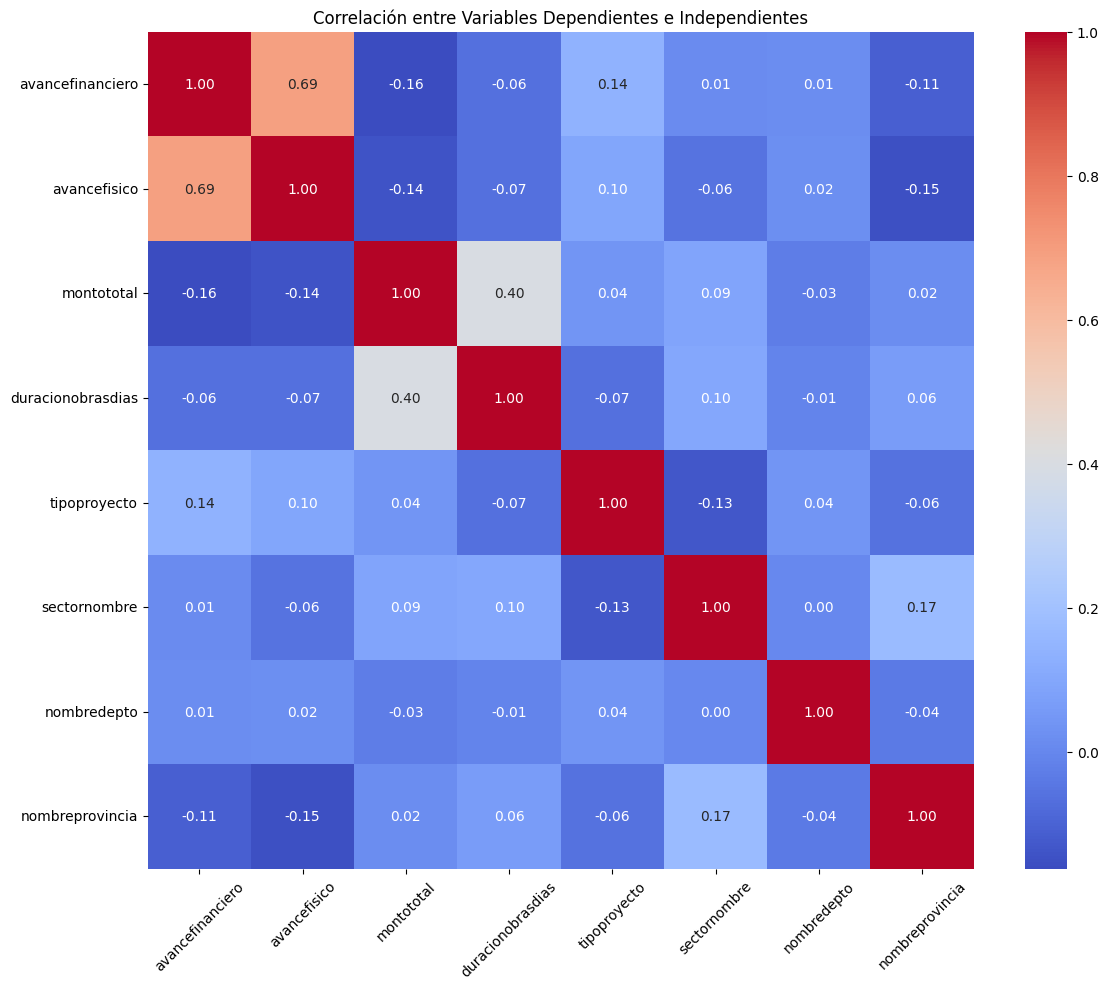

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir las fechas a tipo datetime si no están en ese formato
df_spatial_data_works['fechainicioanio'] = pd.to_datetime(df_spatial_data_works['fechainicioanio'], errors='coerce')
df_spatial_data_works['fechafinanio'] = pd.to_datetime(df_spatial_data_works['fechafinanio'], errors='coerce')

# Convertir las variables categóricas a variables numéricas utilizando códigos
df_spatial_data_works['tipoproyecto'] = pd.Categorical(df_spatial_data_works['tipoproyecto']).codes
df_spatial_data_works['sectornombre'] = pd.Categorical(df_spatial_data_works['sectornombre']).codes
df_spatial_data_works['nombredepto'] = pd.Categorical(df_spatial_data_works['nombredepto']).codes
df_spatial_data_works['nombreprovincia'] = pd.Categorical(df_spatial_data_works['nombreprovincia']).codes

# Asegurarse de que las variables numéricas estén correctamente tipificadas
df_spatial_data_works['montototal'] = pd.to_numeric(df_spatial_data_works['montototal'], errors='coerce')
df_spatial_data_works['avancefinanciero'] = pd.to_numeric(df_spatial_data_works['avancefinanciero'], errors='coerce')
df_spatial_data_works['avancefisico'] = pd.to_numeric(df_spatial_data_works['avancefisico'], errors='coerce')
df_spatial_data_works['duracionobrasdias'] = pd.to_numeric(df_spatial_data_works['duracionobrasdias'], errors='coerce')

# Eliminar filas con valores NaN en las columnas relevantes
df_spatial_data_works.dropna(subset=['avancefinanciero', 'avancefisico', 'montototal', 'duracionobrasdias',
                                     'tipoproyecto', 'sectornombre', 'nombredepto', 'nombreprovincia'], inplace=True)

# Crear la matriz de correlación entre las variables dependientes e independientes
correlation_matrix = df_spatial_data_works[['avancefinanciero', 'avancefisico', 'montototal', 'duracionobrasdias',
                                            'tipoproyecto', 'sectornombre', 'nombredepto', 'nombreprovincia']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables Dependientes e Independientes')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

🔎 Algunas de las conclusiones obtenidas para calcular la correlación entre las variables dependientes e independientes:

*  Avance financiero y Avance físico: Existe una fuerte correlación positiva de 0.69 entre estas dos variables, lo que sugiere que el progreso financiero y el progreso físico de los proyectos tienden a avanzar juntos.

*  Duración de la obra y Monto total: Hay una correlación moderada de 0.40 entre la duración de las obras y el monto total, lo que indica que los proyectos de mayor duración tienden a requerir mayores inversiones.

*  Sectornombre, nombredepto, y nombreprovincia: Estas variables no tienen una correlación significativa con las variables dependientes (avance financiero y físico), lo que indica que la ubicación geográfica o el sector no influyen directamente en el progreso de los proyectos.

*  Estas observaciones ayudan a comprender qué factores están más estrechamente relacionados con el éxito o progreso de los proyectos, lo cual es clave para planificar y priorizar futuras inversiones en infraestructura.

###**<center>🤔¿Cómo se distribuyen los datos en función de diferentes categorías?</center>**

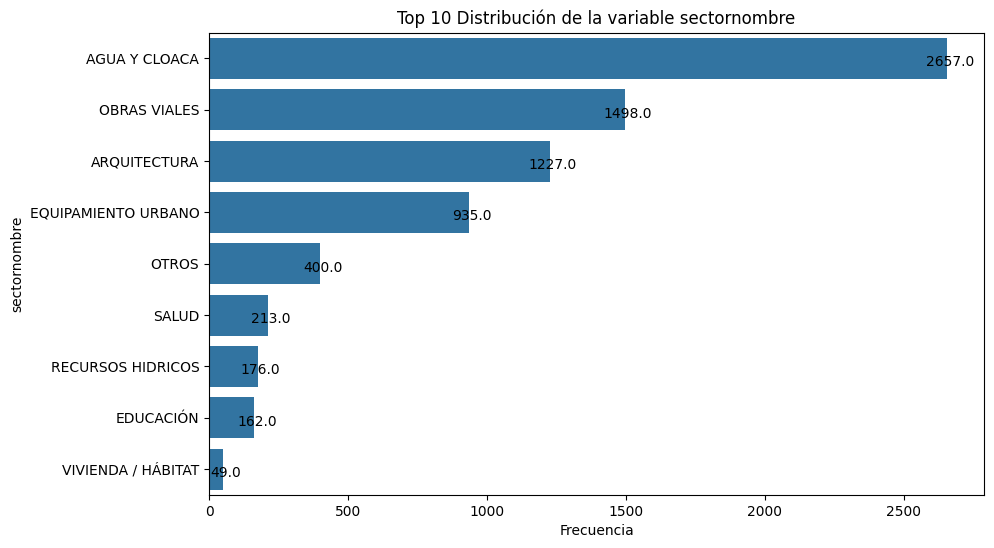

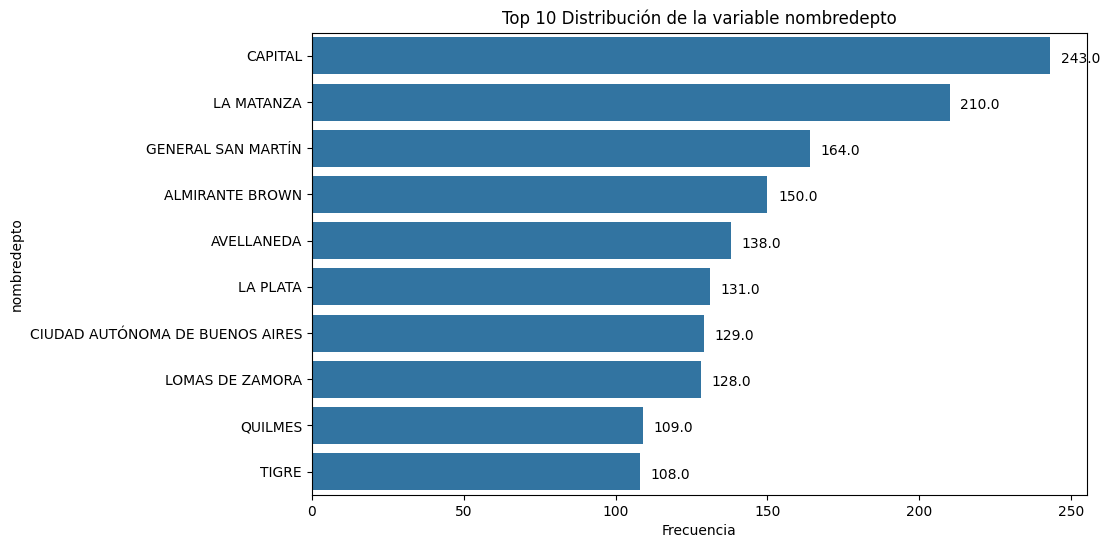

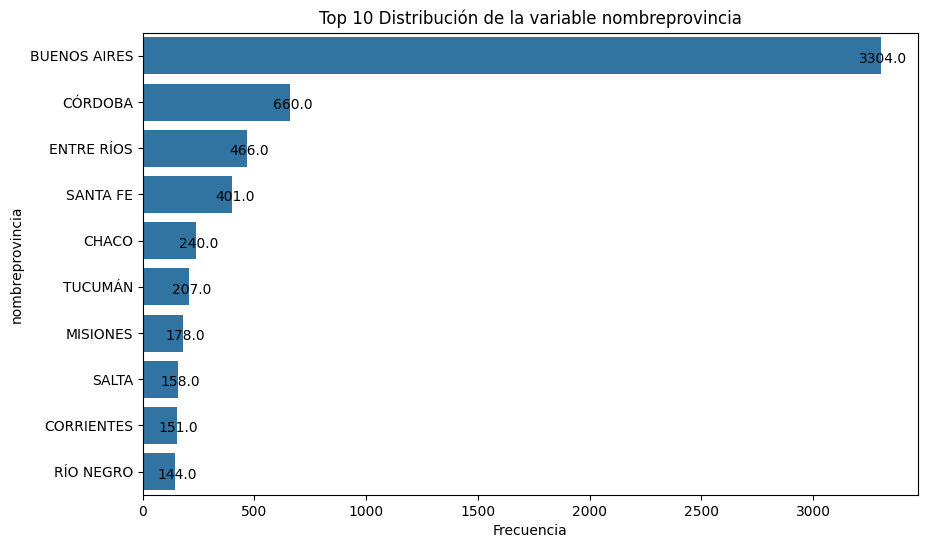

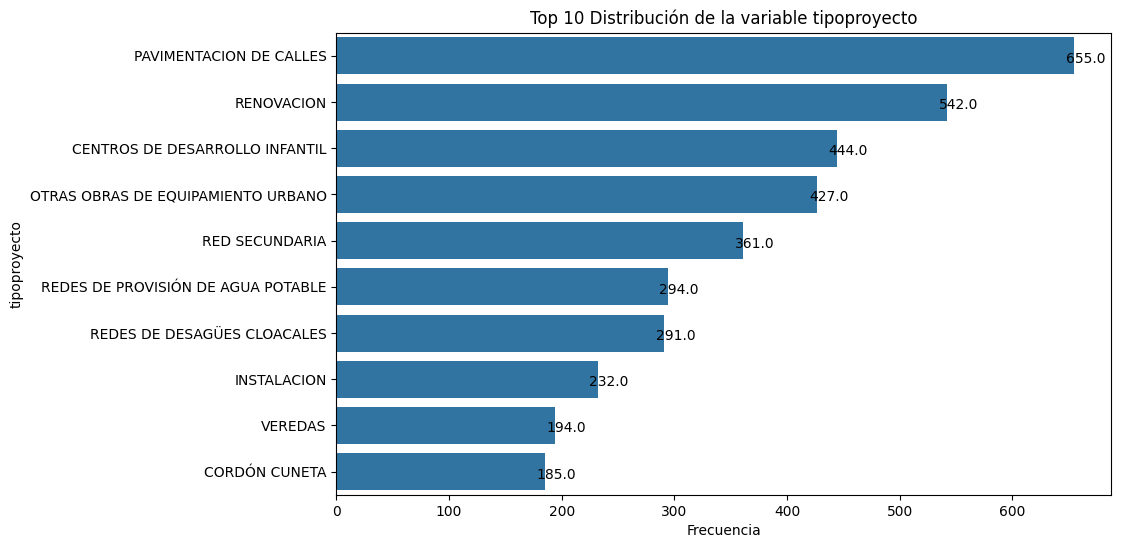

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
df_spatial_data_works_dis_cat = load_csv_from_url(url_spatial_data_works)
# Lista de variables categóricas que deseas analizar
categorical_columns = ['sectornombre', 'nombredepto', 'nombreprovincia', 'tipoproyecto']

# Analizar y visualizar la distribución de datos en función de diferentes categorías
for column in categorical_columns:
    # Crear un gráfico de barras para el top 10 de cada variable categórica
    plt.figure(figsize=(10, 6))
    # Filtrar las 10 categorías más frecuentes
    top_categories = df_spatial_data_works_dis_cat[column].value_counts().nlargest(10)
    # Crear un countplot para el top 10 de cada categoría
    ax = sns.countplot(data=df_spatial_data_works_dis_cat[df_spatial_data_works_dis_cat[column].isin(top_categories.index)],
                       y=column, order=top_categories.index)

    # Añadir etiquetas en las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width() + 10, p.get_y() + 0.55), ha='center')

    plt.title(f'Top 10 Distribución de la variable {column}')
    plt.xlabel('Frecuencia')
    plt.ylabel(column)
    plt.show()


**🔎 Distribución de las variables categóricas:**

*  sectornombre: Los sectores con mayor cantidad de proyectos son "Agua y Cloaca" y "Obras Viales", con una alta concentración en estos sectores clave. Otros sectores como "Arquitectura" y "Equipamiento Urbano" también presentan una cantidad significativa de proyectos.

*  nombredepto: Los departamentos con mayor cantidad de proyectos incluyen "Capital", "La Matanza", y "General San Martín". Estos representan áreas geográficas con mayor actividad de inversión pública.

*  nombreprovincia: "Buenos Aires" sobresale significativamente en comparación con otras provincias como "Córdoba" y "Entre Ríos". Esto sugiere una concentración geográfica en la inversión.

*  tipoproyecto: Los tipos de proyecto más comunes incluyen "Pavimentación de Calles", "Renovación", y "Centros de Desarrollo Infantil", reflejando las prioridades en infraestructura y desarrollo urbano.
Estas distribuciones muestran una tendencia a concentrar proyectos en ciertas áreas geográficas y sectores, lo que podría estar relacionado con las prioridades de desarrollo y las necesidades específicas de infraestructura en estas regiones.

###**<center>🤔¿Existen patrones o agrupaciones (clusters) en los datos con características similares?</center>**

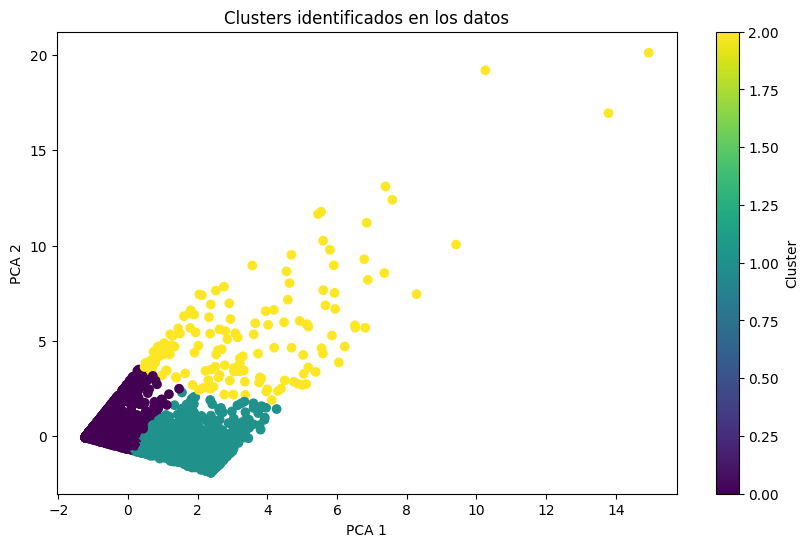

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Seleccionar las características numéricas para el clustering
numeric_columns = ['avancefinanciero', 'avancefisico', 'montototal', 'duracionobrasdias']
data_for_clustering = df_spatial_data_works[numeric_columns]

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Aplicar PCA para reducir la dimensionalidad y facilitar la visualización
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Aplicar K-means con un número predefinido de clusters, por ejemplo, 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Añadir los clusters al DataFrame original
df_spatial_data_works['Cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters identificados en los datos')
plt.colorbar(label='Cluster')
plt.show()

🔎 Explicación Ampliada del Resultado:

*  Tres Clusters Identificados: El análisis de clustering ha revelado tres grupos principales dentro de los datos, lo que indica que los proyectos analizados presentan características similares que permiten agruparlos en estos clusters. Esta agrupación sugiere patrones distintivos en la forma en que se estructuran y gestionan los proyectos.

*  Distribución de los Clusters: El cluster amarillo se caracteriza por una mayor dispersión de datos, lo que implica una mayor variabilidad en las características de los proyectos que lo componen. Por otro lado, los clusters morado y verde presentan una distribución más concentrada, lo que sugiere que los proyectos en estos grupos son más homogéneos, compartiendo atributos o criterios de selección más definidos.

*  Importancia de los Clusters: La identificación de estos clusters es fundamental para optimizar la toma de decisiones en la planificación de la inversión pública y privada. Al reconocer los patrones dentro de cada grupo, las autoridades y las entidades responsables pueden asignar recursos de manera más estratégica para mejorar la infraestructura y cerrar brechas de desarrollo. Este enfoque también facilita la orientación de las inversiones hacia la promoción de la resiliencia climática, la igualdad de género, la buena gobernanza y el desarrollo sostenible.

*  **Siguiente Fase:** En la siguiente fase, se realizará un análisis más detallado utilizando el algoritmo K-Means. Este análisis incorporará la latitud y longitud, al menos a nivel de los nombres de departamentos y provincias, lo que permitirá una visualización geoespacial de los clusters. Esto mejorará la comprensión de cómo se distribuyen geográficamente los proyectos y ayudará a identificar áreas prioritarias para intervenciones específicas.

##**Proyectos de Inversión de la República Argentina (investment_projects)**

Contiene información de los proyectos de obras de Inversión de La República Argentina

###**<center>🤔¿Cuáles son las estadísticas resumidas del conjunto de datos?</center>**

In [112]:
# Obtener información general sobre el DataFrame
df_investment_projects.info()
print("\nInvestment-Projects - Describe\n")
df_investment_projects.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IdProyecto          630 non-null    int64  
 1   CodigoBapin         630 non-null    int64  
 2   NombreProyecto      630 non-null    object 
 3   Sector              630 non-null    object 
 4   Subsector           630 non-null    object 
 5   Tipo                630 non-null    object 
 6   CostoEstimado       630 non-null    float64
 7   FechaEstimacion     630 non-null    object 
 8   Responsable         630 non-null    object 
 9   Plan                630 non-null    object 
 10  Objetivo            133 non-null    object 
 11  Descripcion         630 non-null    object 
 12  NombreProvincia     630 non-null    object 
 13  NombreDepartamento  630 non-null    object 
 14  FechaCargueArchivo  630 non-null    object 
 15  FuenteDatos         630 non-null    object 
 16  url_perf

IdProyecto   CodigoBapin  CostoEstimado
count  6.300000e+02  6.300000e+02   6.300000e+02
mean   1.001582e+09  1.328730e+05   1.085870e+09
std    3.956680e+07  4.460835e+04   8.926337e+09
min    1.003941e+07  0.000000e+00   2.775273e+06
25%    1.003151e+09  1.284070e+05   3.841979e+07
50%    1.003159e+09  1.363185e+05   7.500000e+07
75%    1.003170e+09  1.389670e+05   4.160132e+08
max    1.003176e+09  1.132632e+06   1.925820e+11

###**<center>🤔¿Hay valores faltantes en el conjunto de datos?</center>**

In [113]:
#Verificamos si existen valores faltantes en nuestro conjunto
print("¿Hay valores faltantes en el conjunto de datos investment_projects?")
if (df_investment_projects.isna().values.any())==True:
  print("Sí")
else:
  print("No")

¿Hay valores faltantes en el conjunto de datos investment_projects?
Sí


In [114]:
import pandas as pd

# Calcular la cantidad de valores faltantes por columna
missing_values = df_investment_projects.isnull().sum()

# Filtrar las columnas con valores faltantes
missing_columns = missing_values[missing_values > 0]

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (missing_columns / len(df_investment_projects)) * 100

# Crear un DataFrame para mostrar los resultados
missing_data = pd.DataFrame({
    'Columna': missing_columns.index,
    'Valores Faltantes': missing_columns.values,
    'Porcentaje Faltante': missing_percentage.values
})

# Ordenar el DataFrame por porcentaje faltante en orden descendente
missing_data_sorted = missing_data.sort_values('Porcentaje Faltante', ascending=False)

# Mostrar el DataFrame ordenado
print(missing_data_sorted)

    Columna  Valores Faltantes  Porcentaje Faltante
0  Objetivo                497            78.888889


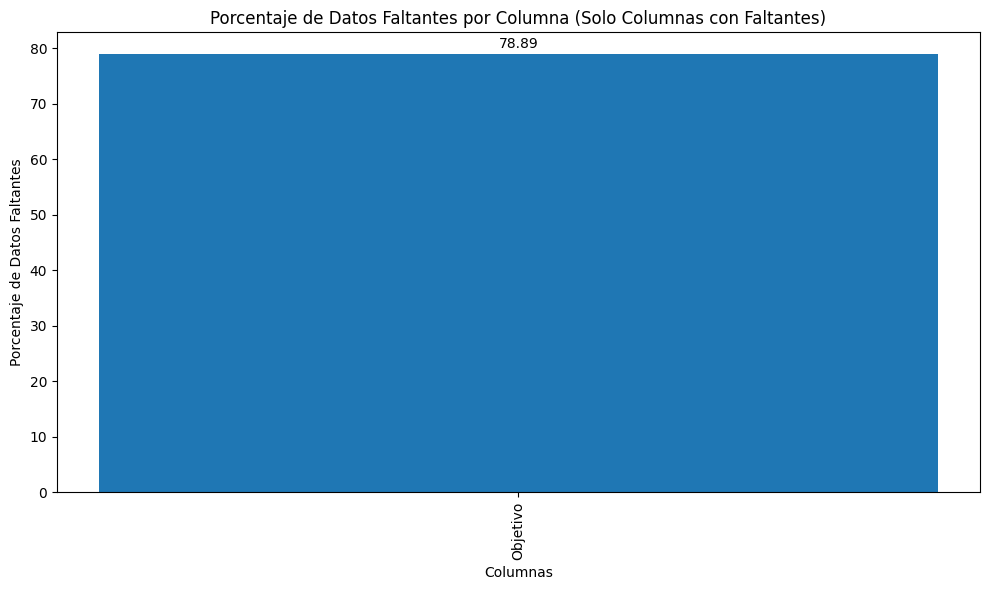

In [115]:
import matplotlib.pyplot as plt

# Calcular el porcentaje de datos faltantes por columna
missing_percentage = df_investment_projects.isnull().sum() * 100 / len(df_investment_projects)

# Filtrar las columnas con datos faltantes
missing_percentage_filtered = missing_percentage[missing_percentage > 0]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_percentage_filtered.index, missing_percentage_filtered.values)
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Datos Faltantes')
plt.title('Porcentaje de Datos Faltantes por Columna (Solo Columnas con Faltantes)')
plt.xticks(rotation=90)

# Agregar etiquetas con el valor faltante a cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Solo la columna **Objetivo** tiene el 78.9 % de datos faltantes

###**<center>🤔¿Se pueden identificar patrones de ausencia?</center>**

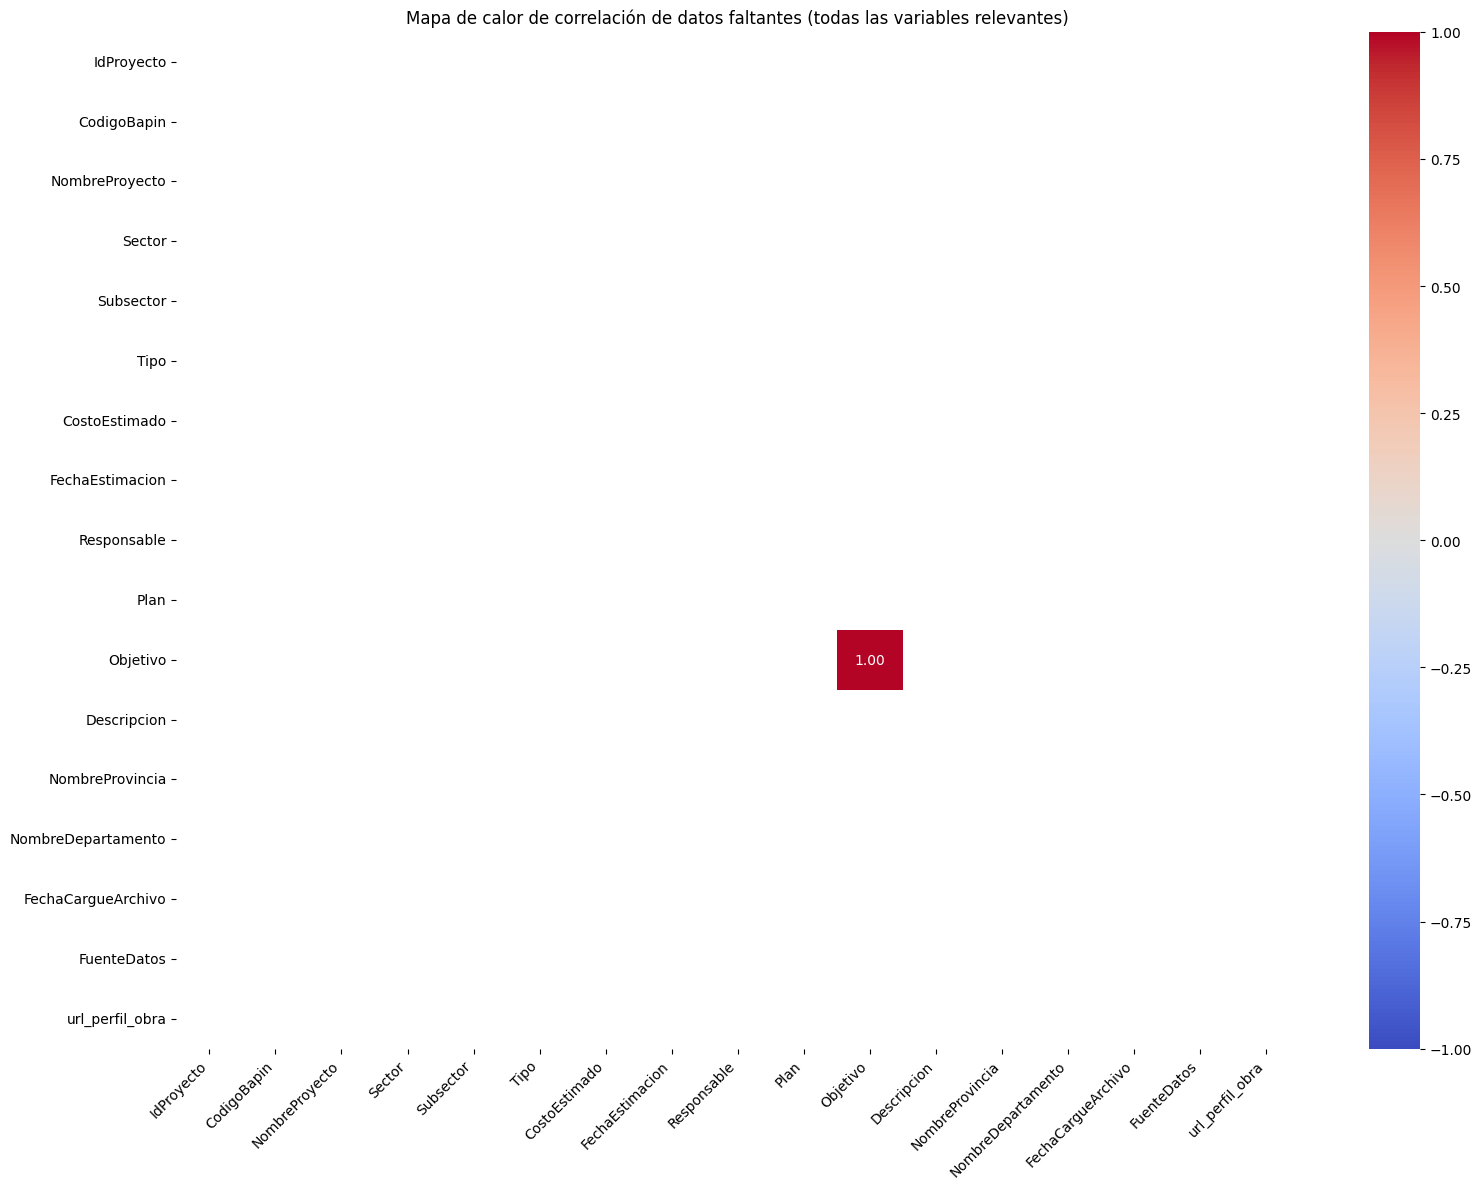

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de correlación de datos faltantes en el conjunto
Correlacion_Faltantes = df_investment_projects.isnull().corr()

# Aumentar el tamaño de la figura
plt.figure(figsize=(16, 12))

# Crear el mapa de calor con etiquetas rotadas en el eje X
sns.heatmap(Correlacion_Faltantes, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de calor de correlación de datos faltantes (todas las variables relevantes)')

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

🔎 Análisis de la Matriz de Correlación de Datos Faltantes:

Identificación de Patrones de Ausencia: La matriz muestra que la variable "Objetivo" es la única con datos faltantes y tiene una correlación perfecta consigo misma. Esto indica que no hay un patrón de ausencia compartido entre las variables, ya que no se observan correlaciones altas (cercanas a 1 o -1) con otras variables.

Relevancia de la Variable 'Objetivo': Antes de eliminar esta variable debido a la falta de datos, es fundamental evaluar su importancia para el análisis general, ya que podría ser clave para el estudio de proyectos.

Impacto en el Análisis: La eliminación o imputación de "Objetivo" debe considerar cómo afectará los resultados. Continuar el análisis exploratorio permitirá determinar si es necesario tratar o eliminar esta variable para mejorar la calidad de los datos y la interpretación.

###**<center>🤔¿Hay valores atípicos en el conjunto de datos?</center>**

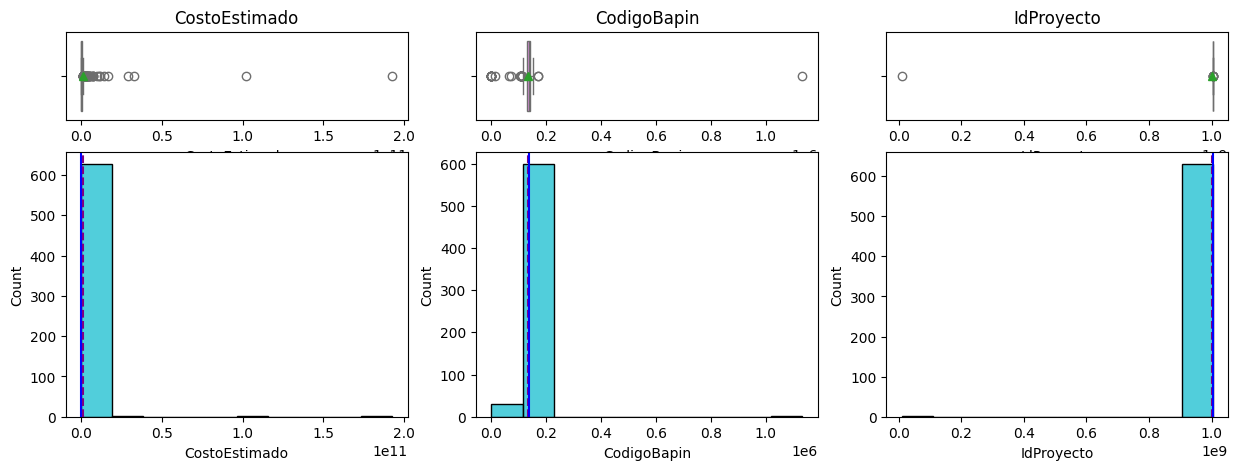

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import math

# Especificar las columnas importantes que deseas analizar
Cols_Importantes = ["CostoEstimado", "CodigoBapin", "IdProyecto"]

# Filtrar solo las columnas numéricas
numeric_cols = df_investment_projects.select_dtypes(include=[np.number]).columns

# Limitar la lista de columnas importantes a solo aquellas que son numéricas
Cols_Importantes = [col for col in Cols_Importantes if col in numeric_cols]

# Función para mostrar solo un grupo de gráficos a la vez
def create_batch_of_plots(df, columns, batch_size=3, figsize=(15, 5), bins=10):
    for i in range(0, len(columns), batch_size):
        pltcols = columns[i:i + batch_size]
        fig, axes = plt.subplots(nrows=2, ncols=len(pltcols), figsize=figsize, gridspec_kw={"height_ratios": (0.25, 0.75)})
        fig.subplots_adjust(hspace=0.18)
        for j, col in enumerate(pltcols):
            feature = df[col]
            ax = axes[0, j]
            ax2 = axes[1, j]
            sns.boxplot(feature, ax=ax, showmeans=True, color='violet', orient="h")
            sns.histplot(feature, kde=False, ax=ax2, bins=bins, color='tab:cyan')
            ax2.axvline(np.mean(feature), color='purple', linestyle='--')
            ax2.axvline(np.median(feature), color='blue', linestyle='-')
            ax.set_title(col).set_position([0.5, -3])
        plt.show()

warnings.filterwarnings("ignore")

# Llamar a la función para crear los gráficos solo para las variables importantes y numéricas
create_batch_of_plots(df_investment_projects, Cols_Importantes)


🔎 Para las variables numéricas seleccionadas en el análisis de valores atípicos, se observan los siguientes puntos clave:

*  CostoEstimado: La mayoría de los proyectos se agrupan en montos relativamente bajos, pero existen algunos valores atípicos muy elevados, lo que sugiere proyectos con un financiamiento significativamente mayor. Estos valores atípicos podrían estar relacionados con proyectos de gran envergadura.

*  CodigoBapin e IdProyecto: Estas variables muestran una distribución muy concentrada, con algunos valores atípicos elevados. Aunque estos no proporcionan mucha información cualitativa, son importantes para identificar proyectos individuales que puedan estar fuera de la norma.

*  En general, los valores atípicos identificados pueden señalar la necesidad de un análisis adicional para comprender mejor los proyectos que se desvían significativamente de la media.

###**<center>🤔¿Cuál es la cardinalidad de las variables categóricas?</center>**

**********************************************************************************************
A continuación se detalla la cardinalidad para las columnas categóricas del conjunto de datos:
**********************************************************************************************
NombreProyecto        597
Sector                  9
Subsector              25
Tipo                   78
FechaEstimacion       280
Responsable            14
Plan                    3
Objetivo              110
Descripcion           566
NombreProvincia        24
NombreDepartamento    250
FechaCargueArchivo      1
FuenteDatos             1
url_perfil_obra       630
dtype: int64


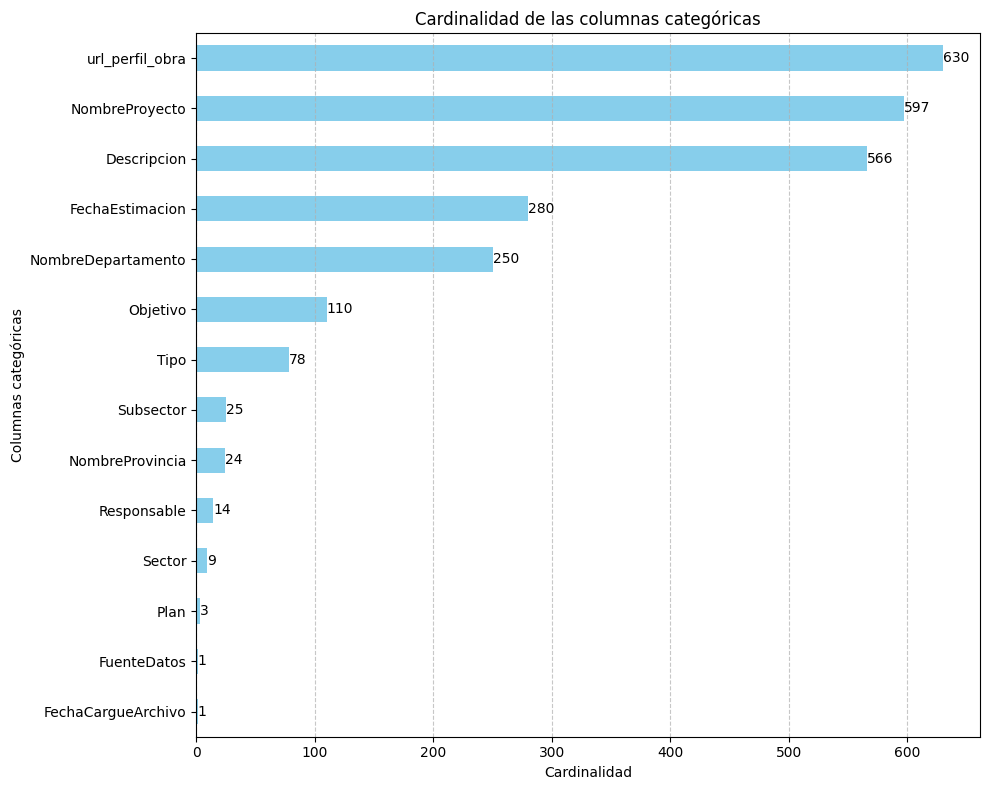

In [118]:
import matplotlib.pyplot as plt

# Cargar solo las columnas categóricas (string y object)
Columnas_Categoricas = df_investment_projects.select_dtypes(include=['string', 'object']).columns

# Verificar si hay columnas categóricas
if len(Columnas_Categoricas) > 0:
    # Calcular la cardinalidad de las columnas categóricas
    Cardinalidad_Categoricas = df_investment_projects[Columnas_Categoricas].nunique()

    # Comprobar si hay resultados antes de graficar
    if not Cardinalidad_Categoricas.empty:
        print("**********************************************************************************************")
        print("A continuación se detalla la cardinalidad para las columnas categóricas del conjunto de datos:")
        print("**********************************************************************************************")
        print(Cardinalidad_Categoricas)

        # Graficar la cardinalidad de las columnas categóricas
        plt.figure(figsize=(10, 8))
        barplot = Cardinalidad_Categoricas.sort_values().plot(kind='barh', color='skyblue')
        plt.title('Cardinalidad de las columnas categóricas')
        plt.xlabel('Cardinalidad')
        plt.ylabel('Columnas categóricas')
        plt.grid(axis='x', linestyle='--', alpha=0.7)

        # Colocar los valores únicos en cada barra
        for i, v in enumerate(Cardinalidad_Categoricas.sort_values()):
            plt.text(v + 0.1, i, str(v), color='black', va='center')

        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron columnas categóricas con valores únicos.")
else:
    print("No se encontraron columnas categóricas en el DataFrame.")


🔎 Explicación de la Cardinalidad de las Columnas Categóricas:

*  En la gráfica presentada, observamos la cardinalidad de las columnas categóricas en el dataset de proyectos de inversión. La cardinalidad se refiere al número de valores únicos que cada columna puede tomar:

*  url_perfil_obra tiene la mayor cardinalidad con 630 valores únicos, lo que indica que cada proyecto tiene un perfil de obra diferente.

*  NombreProyecto y Descripción también muestran alta cardinalidad, con 597 y 566 valores únicos respectivamente, lo que sugiere una gran variedad de proyectos.

*  FechaEstimacion y NombreDepartamento tienen cardinalidades medianas, reflejando diversidad en las fechas de estimación y los departamentos involucrados.

*  Las columnas Objetivo y Tipo tienen menor cardinalidad, indicando un menor número de categorías distintas.

*  Las columnas FuenteDatos y FechaCargueArchivo tienen la menor cardinalidad, con solo un valor único cada una, lo que podría sugerir un valor constante o una falta de diversidad en esos campos.

###**<center>🤔¿Existen distribuciones sesgadas en el conjunto de datos?</center>**

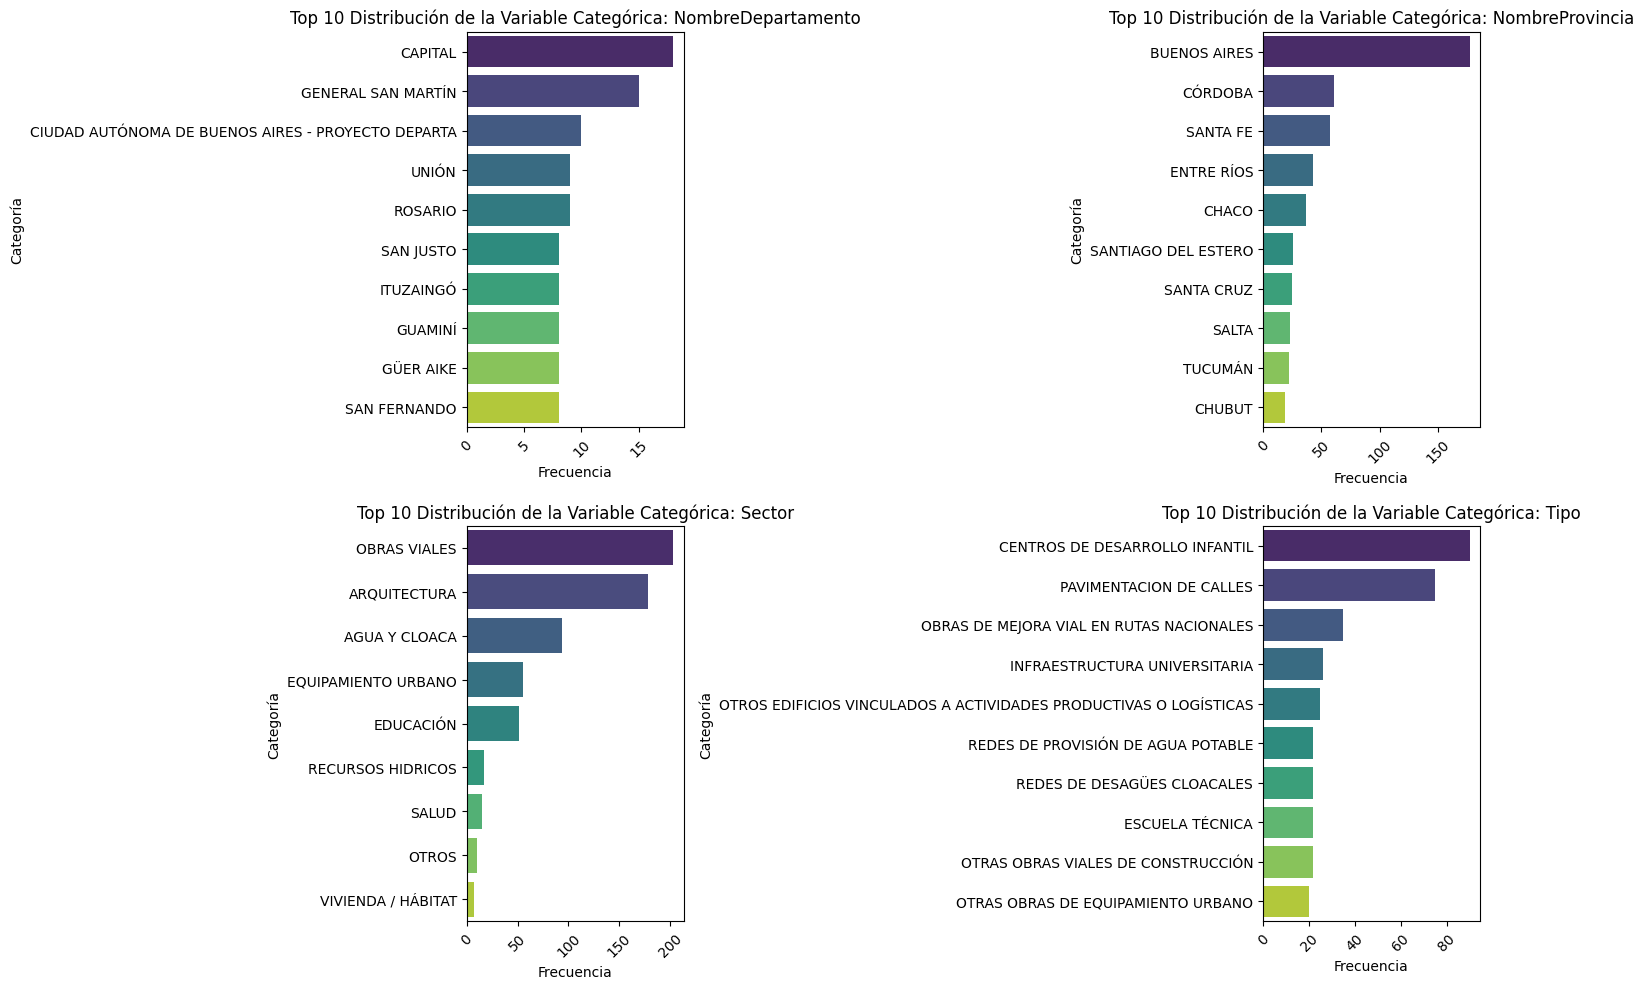

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar algunas columnas categóricas de interés
Columnas_Categoricas = ['NombreDepartamento', 'NombreProvincia', 'Sector', 'Tipo']

# Configurar subplots para mostrar las distribuciones
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Iterar sobre las columnas categóricas y los ejes para graficar
for i, (col, ax) in enumerate(zip(Columnas_Categoricas, axes.flatten())):
    top_categories = df_investment_projects[col].value_counts().nlargest(10).index
    sns.countplot(data=df_investment_projects[df_investment_projects[col].isin(top_categories)],
                  y=col, ax=ax, palette="viridis", order=top_categories)
    ax.set_xlabel('Frecuencia')
    ax.set_ylabel('Categoría')
    ax.set_title(f'Top 10 Distribución de la Variable Categórica: {col}')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


###**<center>🤔¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).</center>**

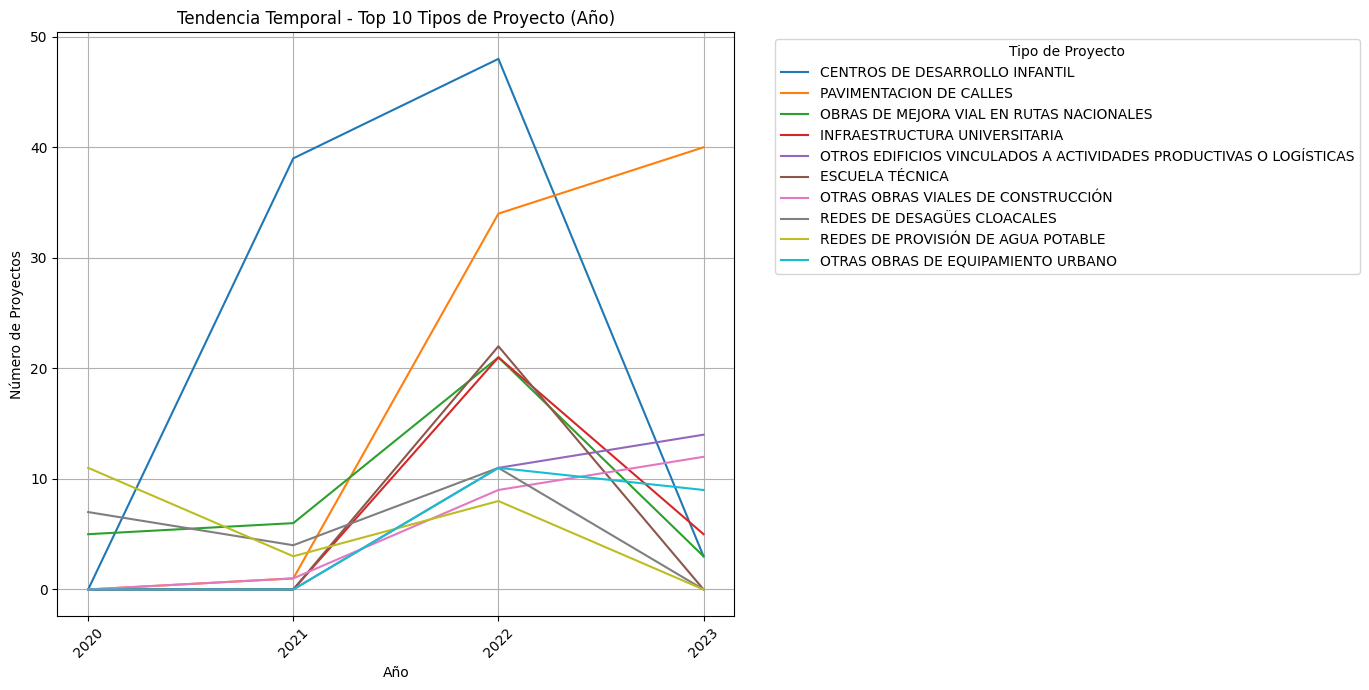

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir 'FechaEstimacion' a tipo datetime
df_investment_projects['FechaEstimacion'] = pd.to_datetime(df_investment_projects['FechaEstimacion'], errors='coerce')

# Asegurar que solo los datos válidos se incluyen y que el año está en el rango esperado
df_investment_projects['anio'] = df_investment_projects['FechaEstimacion'].dt.year
df_investment_projects = df_investment_projects[df_investment_projects['anio'].between(2000, 2025)]

# Contar el número de proyectos por año y tipo de proyecto
top_tipos_proyecto = df_investment_projects['Tipo'].value_counts().nlargest(10).index
df_filtrado = df_investment_projects[df_investment_projects['Tipo'].isin(top_tipos_proyecto)]

# Agrupar solo por año y tipo de proyecto, excluyendo meses
ocurrencias_por_anio = df_filtrado.groupby(['anio', 'Tipo']).size().unstack(fill_value=0)

# Ordenar las columnas por el número total de proyectos de mayor a menor
ocurrencias_por_anio = ocurrencias_por_anio[ocurrencias_por_anio.sum().sort_values(ascending=False).index]

# Graficar las tendencias temporales por año
plt.figure(figsize=(14, 7))
ocurrencias_por_anio.plot(ax=plt.gca())
plt.xlabel('Año')
plt.ylabel('Número de Proyectos')
plt.title('Tendencia Temporal - Top 10 Tipos de Proyecto (Año)')
plt.xticks(ticks=ocurrencias_por_anio.index, labels=ocurrencias_por_anio.index.astype(int), rotation=45)  # Asegurar que solo se muestren años enteros
plt.legend(title='Tipo de Proyecto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


🔎 Conclusiones:

*  Pico en 2021 y 2022: Se observa un incremento considerable en el número de proyectos entre 2020 y 2022, alcanzando un máximo en 2021 para algunos tipos de proyectos como "Centros de Desarrollo Infantil" y "Pavimentación de Calles". Este comportamiento sugiere una fuerte inversión en estos años, posiblemente debido a un enfoque estratégico en mejorar la infraestructura social y vial.

*  Descenso en 2023: A partir de 2022, se nota un descenso marcado en el número de proyectos, con una caída más significativa en 2023. Esto podría reflejar un cambio en las prioridades gubernamentales, una disminución en la asignación de recursos, o la finalización de proyectos importantes que fueron iniciados en los años anteriores.

*  Dominancia de Ciertos Proyectos: Los "Centros de Desarrollo Infantil" y la "Pavimentación de Calles" destacan como los tipos de proyecto más dominantes a lo largo de los años, lo que indica una alta prioridad en el desarrollo social y de infraestructura vial. Este enfoque podría estar alineado con políticas públicas que buscan mejorar la calidad de vida de la población y la conectividad en el país.

*  Diversificación y Estabilidad: A pesar de las fluctuaciones en algunos tipos de proyectos, otros como "Obras de Mejora Vial en Rutas Nacionales" y "Redes de Provisión de Agua Potable" han mostrado una estabilidad relativa. Esta estabilidad puede ser indicativa de la continuidad en la inversión en áreas críticas de infraestructura, necesarias para el desarrollo sostenible del país.

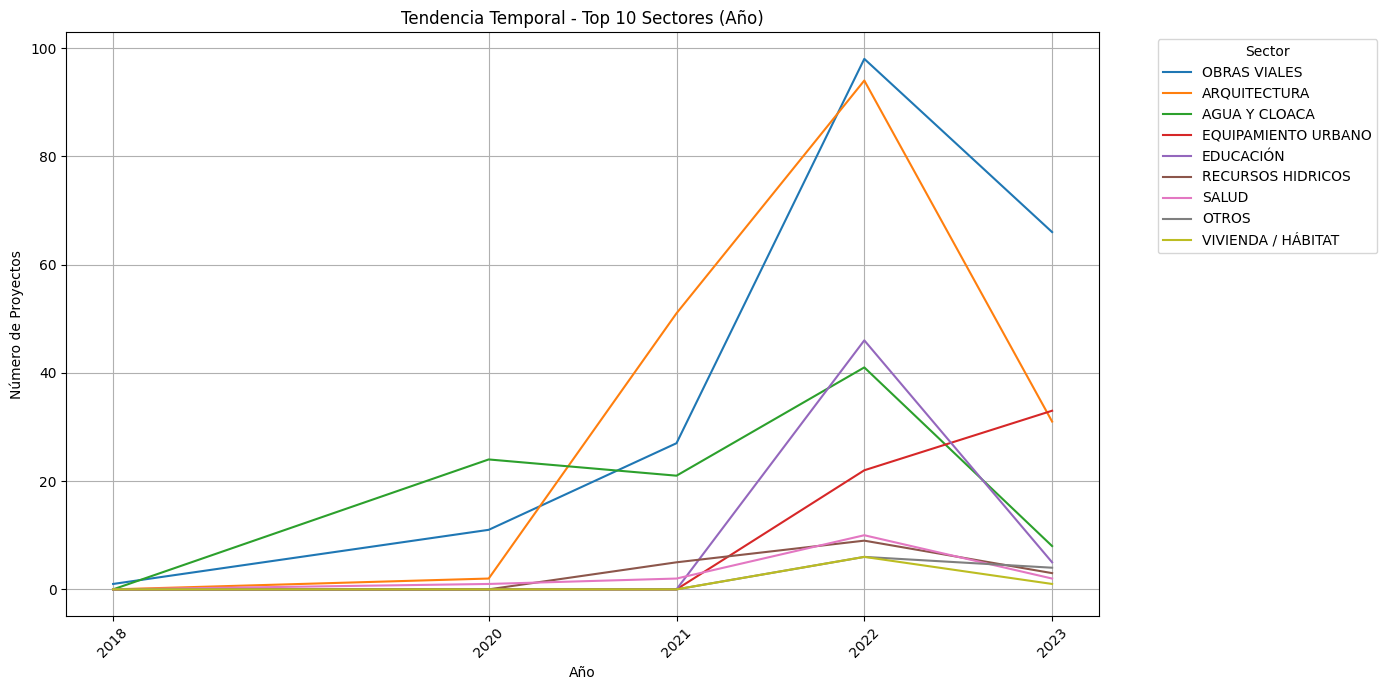

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir 'FechaEstimacion' a tipo datetime
df_investment_projects['FechaEstimacion'] = pd.to_datetime(df_investment_projects['FechaEstimacion'], errors='coerce')

# Asegurar que solo los datos válidos se incluyen y que el año está en el rango esperado
df_investment_projects['anio'] = df_investment_projects['FechaEstimacion'].dt.year
df_investment_projects = df_investment_projects[df_investment_projects['anio'].between(2000, 2025)]

# Contar el número de proyectos por año y sector
top_sectores = df_investment_projects['Sector'].value_counts().nlargest(10).index
df_filtrado = df_investment_projects[df_investment_projects['Sector'].isin(top_sectores)]

# Agrupar solo por año y sector, excluyendo meses
ocurrencias_por_anio = df_filtrado.groupby(['anio', 'Sector']).size().unstack(fill_value=0)

# Ordenar las columnas por el número total de proyectos de mayor a menor
ocurrencias_por_anio = ocurrencias_por_anio[ocurrencias_por_anio.sum().sort_values(ascending=False).index]

# Graficar las tendencias temporales por año
plt.figure(figsize=(14, 7))
ocurrencias_por_anio.plot(ax=plt.gca())
plt.xlabel('Año')
plt.ylabel('Número de Proyectos')
plt.title('Tendencia Temporal - Top 10 Sectores (Año)')
plt.xticks(ticks=ocurrencias_por_anio.index, labels=ocurrencias_por_anio.index.astype(int), rotation=45)  # Asegurar que solo se muestren años enteros
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


🔎 Conclusiones:

*  Pico en 2021 y 2022: Se observa un incremento notable en el número de proyectos entre 2020 y 2022, con un pico máximo en 2022, especialmente en los sectores de "Obras Viales" y "Arquitectura". Este patrón sugiere un fuerte impulso en la inversión en infraestructura vial y edificaciones, probablemente como parte de una estrategia de desarrollo integral en el país.

*  Descenso en 2023: Tras el aumento observado en 2022, se evidencia una disminución significativa en 2023 en la mayoría de los sectores, particularmente en "Obras Viales" y "Arquitectura". Esto podría reflejar un ajuste en las prioridades gubernamentales o la culminación de proyectos clave iniciados en años anteriores.

*  Dominancia de Sectores Clave: Los sectores de "Obras Viales" y "Arquitectura" se destacan como los más representativos a lo largo del período analizado, lo que indica una priorización en el desarrollo de infraestructura fundamental para la movilidad y el urbanismo.

*  Crecimiento en Sectores Específicos: Sectores como "Educación" y "Recursos Hídricos" han mostrado un crecimiento sostenido a lo largo de los años, lo que sugiere un enfoque continuo en mejorar la infraestructura educativa y la gestión del agua, áreas críticas para el desarrollo sostenible.

*  Diversificación de Proyectos: A pesar de la concentración en algunos sectores, hay una diversidad en la inversión, con sectores como "Salud" y "Vivienda / Hábitat" manteniéndose relevantes aunque con menor volumen en comparación con los sectores más dominantes. Esto demuestra un enfoque integral en el desarrollo de infraestructura en múltiples áreas clave.

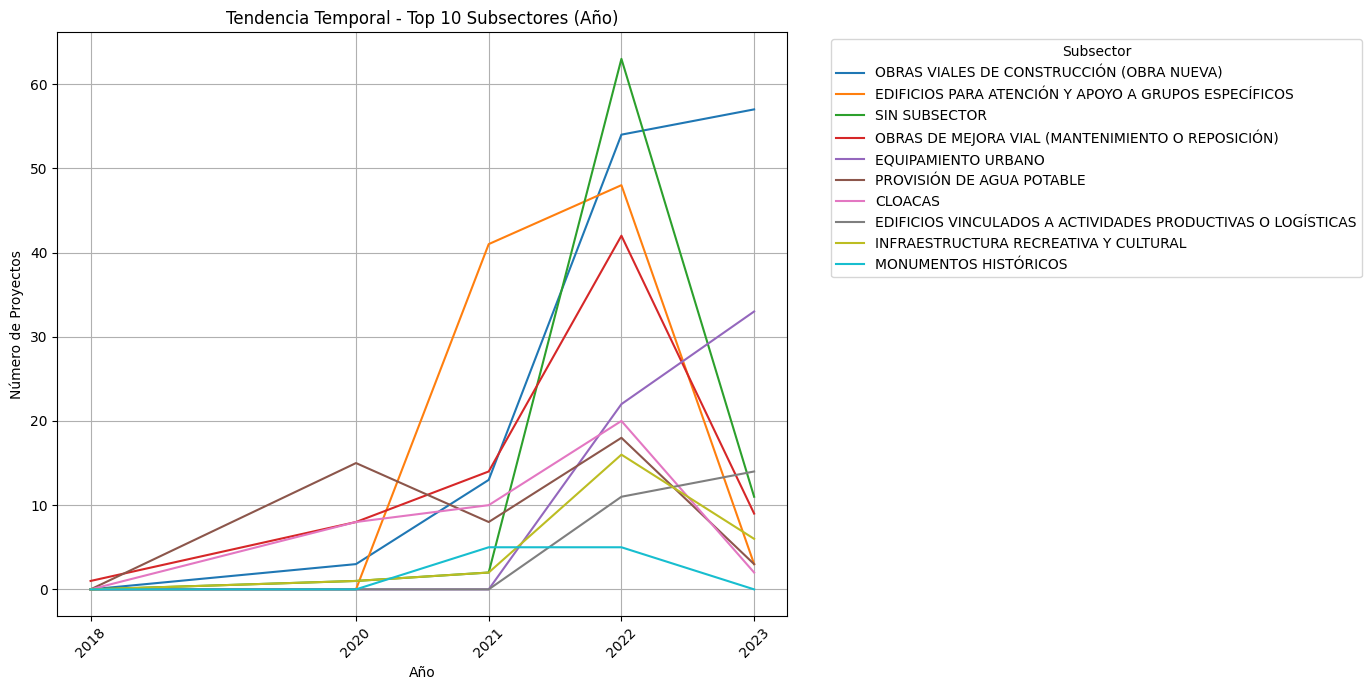

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir 'FechaEstimacion' a tipo datetime
df_investment_projects['FechaEstimacion'] = pd.to_datetime(df_investment_projects['FechaEstimacion'], errors='coerce')

# Asegurar que solo los datos válidos se incluyen y que el año está en el rango esperado
df_investment_projects['anio'] = df_investment_projects['FechaEstimacion'].dt.year
df_investment_projects = df_investment_projects[df_investment_projects['anio'].between(2000, 2025)]

# Contar el número de proyectos por año y subsector
top_subsectores = df_investment_projects['Subsector'].value_counts().nlargest(10).index
df_filtrado = df_investment_projects[df_investment_projects['Subsector'].isin(top_subsectores)]

# Agrupar solo por año y subsector, excluyendo meses
ocurrencias_por_anio = df_filtrado.groupby(['anio', 'Subsector']).size().unstack(fill_value=0)

# Ordenar las columnas por el número total de proyectos de mayor a menor
ocurrencias_por_anio = ocurrencias_por_anio[ocurrencias_por_anio.sum().sort_values(ascending=False).index]

# Graficar las tendencias temporales por año
plt.figure(figsize=(14, 7))
ocurrencias_por_anio.plot(ax=plt.gca())
plt.xlabel('Año')
plt.ylabel('Número de Proyectos')
plt.title('Tendencia Temporal - Top 10 Subsectores (Año)')
plt.xticks(ticks=ocurrencias_por_anio.index, labels=ocurrencias_por_anio.index.astype(int), rotation=45)  # Asegurar que solo se muestren años enteros
plt.legend(title='Subsector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


🔎 Conclusiones:

*  Crecimiento Rápido en 2021 y 2022: Los subsectores como "Obras Viales de Construcción (Obra Nueva)" y "Edificios para Atención y Apoyo a Grupos Específicos" experimentaron un crecimiento acelerado, alcanzando su punto máximo en 2021 y 2022, respectivamente. Este comportamiento sugiere un enfoque estratégico en el desarrollo de infraestructuras viales y edificaciones sociales durante este período.

*  Pico en Proyectos sin Subsector: Se observa un incremento significativo en los proyectos clasificados como "Sin Subsector" en 2021, lo cual podría indicar una categorización incompleta o una diversificación en tipos de proyectos que no se ajustan a los subsectores convencionales.

*  Caída Pronunciada en 2023: Después de los picos observados en 2021 y 2022, la mayoría de los subsectores muestra una disminución significativa en el número de proyectos en 2023. Esta tendencia podría estar relacionada con la culminación de proyectos iniciados en años anteriores o un ajuste en las políticas de inversión.

*  Diversificación en Sectores Clave: Subsectores como "Provisión de Agua Potable" y "Cloacas" han mantenido una presencia constante a lo largo de los años, lo que refleja la importancia continua de las infraestructuras de agua y saneamiento en los planes de inversión del país.

*  Estabilidad en Infraestructuras Especializadas: Aunque con menor volumen en comparación con otros subsectores, áreas como "Infraestructura Recreativa y Cultural" y "Monumentos Históricos" han mantenido su relevancia, lo que indica un compromiso sostenido con la preservación y el desarrollo de infraestructuras culturales y patrimoniales.

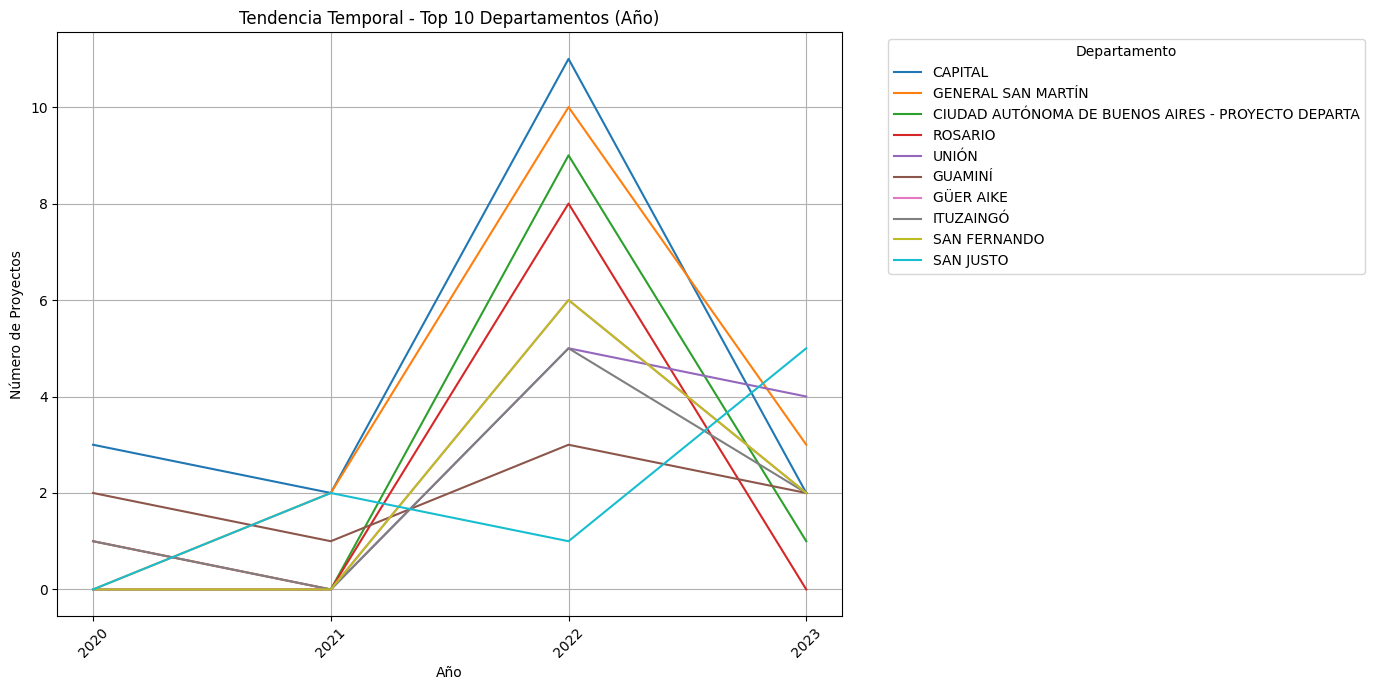

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir 'FechaEstimacion' a tipo datetime
df_investment_projects['FechaEstimacion'] = pd.to_datetime(df_investment_projects['FechaEstimacion'], errors='coerce')

# Asegurar que solo los datos válidos se incluyen y que el año está en el rango esperado
df_investment_projects['anio'] = df_investment_projects['FechaEstimacion'].dt.year
df_investment_projects = df_investment_projects[df_investment_projects['anio'].between(2000, 2025)]

# Contar el número de proyectos por año y departamento
top_departamentos = df_investment_projects['NombreDepartamento'].value_counts().nlargest(10).index
df_filtrado = df_investment_projects[df_investment_projects['NombreDepartamento'].isin(top_departamentos)]

# Agrupar solo por año y departamento, excluyendo meses
ocurrencias_por_anio = df_filtrado.groupby(['anio', 'NombreDepartamento']).size().unstack(fill_value=0)

# Ordenar las columnas por el número total de proyectos de mayor a menor
ocurrencias_por_anio = ocurrencias_por_anio[ocurrencias_por_anio.sum().sort_values(ascending=False).index]

# Graficar las tendencias temporales por año
plt.figure(figsize=(14, 7))
ocurrencias_por_anio.plot(ax=plt.gca())
plt.xlabel('Año')
plt.ylabel('Número de Proyectos')
plt.title('Tendencia Temporal - Top 10 Departamentos (Año)')
plt.xticks(ticks=ocurrencias_por_anio.index, labels=ocurrencias_por_anio.index.astype(int), rotation=45)  # Asegurar que solo se muestren años enteros
plt.legend(title='Departamento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


🔎 Conclusiones:

*  Pico en 2021 y 2022: La mayoría de los departamentos en el top 10, como "Capital", "General San Martín", y "Ciudad Autónoma de Buenos Aires - Proyecto Departamento", muestran un aumento significativo en el número de proyectos entre 2020 y 2022, con un pico máximo en 2021 o 2022. Este patrón sugiere una fuerte concentración de inversiones en estos departamentos durante ese período, posiblemente debido a proyectos prioritarios o de alto impacto.

*  Disminución en 2023: Después de los picos observados en 2021 y 2022, se observa una notable disminución en el número de proyectos en 2023 en la mayoría de los departamentos. Este descenso podría estar asociado con la finalización de proyectos clave o con un cambio en las prioridades de inversión.

*  Liderazgo del Departamento Capital: El departamento de "Capital" destaca consistentemente con el mayor número de proyectos en los últimos años, lo que indica su importancia como centro de inversión. Este enfoque podría reflejar la necesidad de mantener y desarrollar la infraestructura en la capital para sostener su crecimiento y demanda.

*  Diversificación de Proyectos en Otros Departamentos: A pesar de que "Capital" y "General San Martín" lideran en términos de número de proyectos, otros departamentos como "Rosario" y "San Justo" también han mostrado una actividad significativa, lo que refleja una distribución más amplia de las inversiones en diferentes áreas geográficas.

*  Fluctuación en la Inversión Regional: La fluctuación en el número de proyectos en varios departamentos, con subidas y bajadas pronunciadas, sugiere que las decisiones de inversión han estado influenciadas por factores específicos de cada región, como la disponibilidad de recursos, la finalización de proyectos grandes o cambios en las políticas locales.

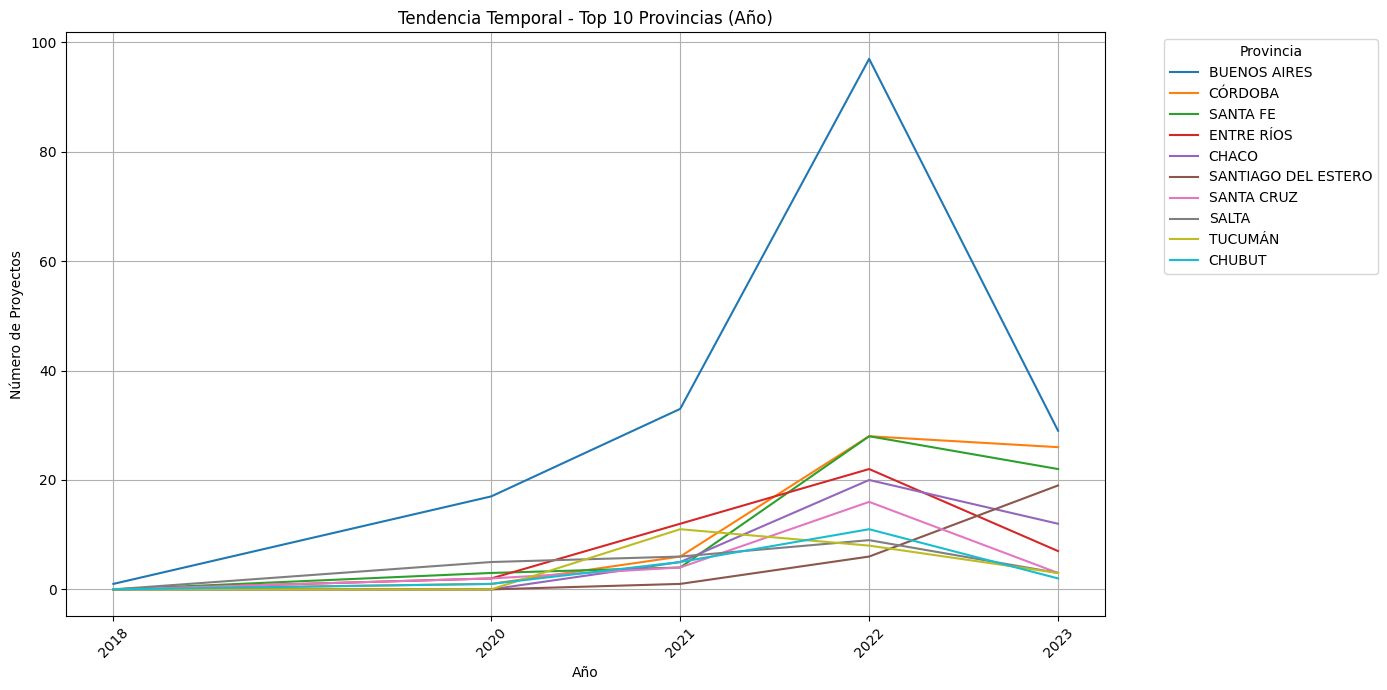

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir 'FechaEstimacion' a tipo datetime
df_investment_projects['FechaEstimacion'] = pd.to_datetime(df_investment_projects['FechaEstimacion'], errors='coerce')

# Asegurar que solo los datos válidos se incluyen y que el año está en el rango esperado
df_investment_projects['anio'] = df_investment_projects['FechaEstimacion'].dt.year
df_investment_projects = df_investment_projects[df_investment_projects['anio'].between(2000, 2025)]

# Contar el número de proyectos por año y provincia
top_provincias = df_investment_projects['NombreProvincia'].value_counts().nlargest(10).index
df_filtrado = df_investment_projects[df_investment_projects['NombreProvincia'].isin(top_provincias)]

# Agrupar solo por año y provincia, excluyendo meses
ocurrencias_por_anio = df_filtrado.groupby(['anio', 'NombreProvincia']).size().unstack(fill_value=0)

# Ordenar las columnas por el número total de proyectos de mayor a menor
ocurrencias_por_anio = ocurrencias_por_anio[ocurrencias_por_anio.sum().sort_values(ascending=False).index]

# Graficar las tendencias temporales por año
plt.figure(figsize=(14, 7))
ocurrencias_por_anio.plot(ax=plt.gca())
plt.xlabel('Año')
plt.ylabel('Número de Proyectos')
plt.title('Tendencia Temporal - Top 10 Provincias (Año)')
plt.xticks(ticks=ocurrencias_por_anio.index, labels=ocurrencias_por_anio.index.astype(int), rotation=45)  # Asegurar que solo se muestren años enteros
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


🔎 Conclusiones:

*  Predominio de Buenos Aires: La provincia de "Buenos Aires" destaca significativamente por encima de las demás, alcanzando su máximo en 2022 con casi 100 proyectos. Esto subraya la importancia de esta provincia como un centro de inversión clave, probablemente debido a su densidad poblacional y su rol económico estratégico en el país.

*  Incremento en 2021 y 2022: Provincias como "Córdoba", "Santa Fe", y "Entre Ríos" muestran un crecimiento notable en el número de proyectos entre 2021 y 2022, lo que sugiere un enfoque sostenido en el desarrollo de infraestructura en estas regiones durante estos años.

*  Disminución en 2023: A partir de 2022, se observa una reducción en el número de proyectos en la mayoría de las provincias, incluidas las más destacadas como Buenos Aires y Córdoba. Esta caída podría estar relacionada con la finalización de proyectos grandes o un ajuste en las políticas de inversión debido a cambios en las prioridades gubernamentales.

*  Diversificación Regional: A pesar de la dominancia de Buenos Aires, otras provincias como "Santa Fe", "Chaco", y "Tucumán" también muestran una cantidad considerable de proyectos, lo que indica un esfuerzo por distribuir las inversiones de manera más equilibrada en todo el país.

*  Crecimiento Continuo en Áreas Clave: Provincias como "Chubut" y "Santa Cruz" han mostrado un crecimiento constante en el número de proyectos, reflejando un interés sostenido en el desarrollo de infraestructuras en estas regiones, posiblemente en sectores estratégicos como la energía y los recursos naturales.

###**<center>🤔¿Hay correlación entre las variables dependientes e independientes?</center>**

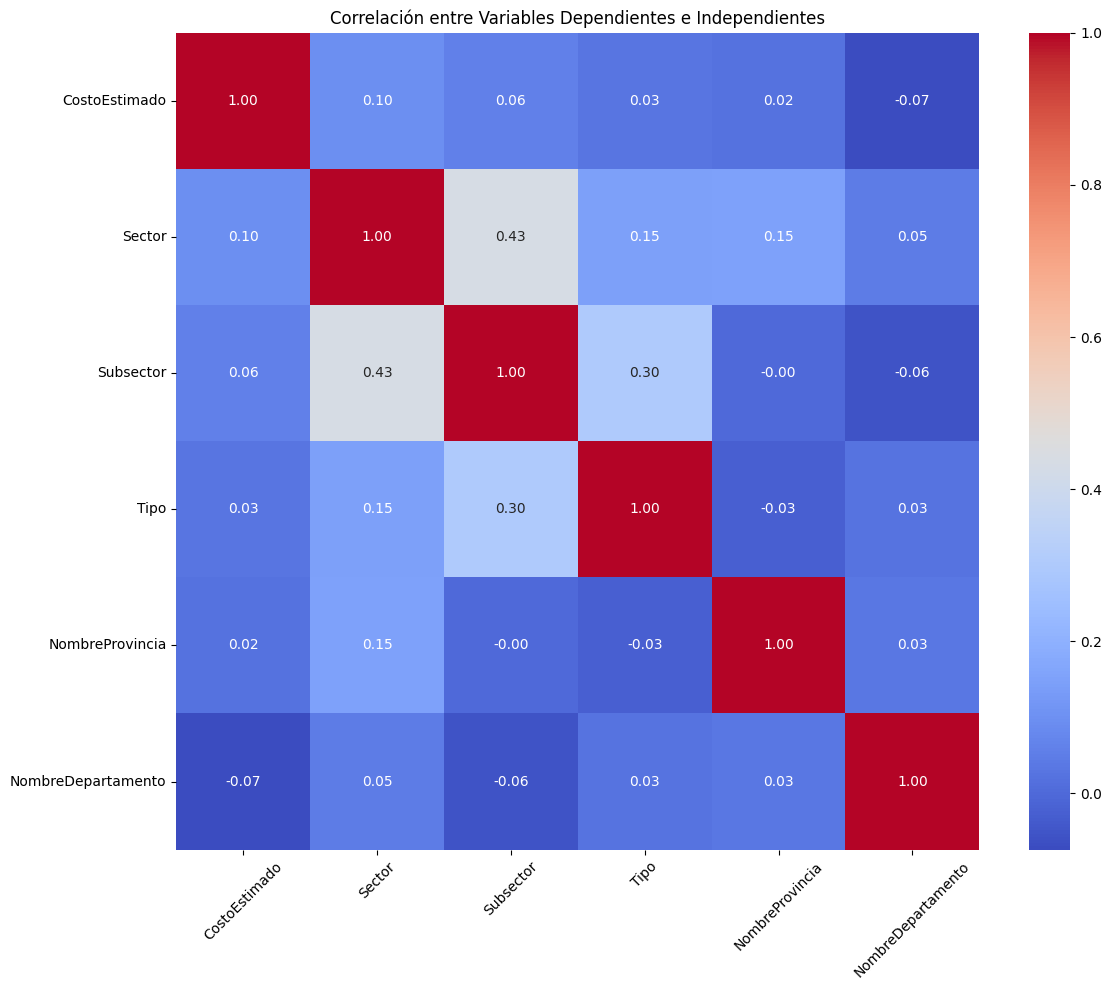

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir 'FechaEstimacion' a tipo datetime si no está en ese formato
df_investment_projects['FechaEstimacion'] = pd.to_datetime(df_investment_projects['FechaEstimacion'], errors='coerce')

# Convertir las variables categóricas a variables numéricas utilizando códigos
df_investment_projects['Sector'] = pd.Categorical(df_investment_projects['Sector']).codes
df_investment_projects['Subsector'] = pd.Categorical(df_investment_projects['Subsector']).codes
df_investment_projects['Tipo'] = pd.Categorical(df_investment_projects['Tipo']).codes
df_investment_projects['NombreProvincia'] = pd.Categorical(df_investment_projects['NombreProvincia']).codes
df_investment_projects['NombreDepartamento'] = pd.Categorical(df_investment_projects['NombreDepartamento']).codes

# Asegurarse de que las variables numéricas estén correctamente tipificadas
df_investment_projects['CostoEstimado'] = pd.to_numeric(df_investment_projects['CostoEstimado'], errors='coerce')

# Eliminar filas con valores NaN en las columnas relevantes
df_investment_projects.dropna(subset=['CostoEstimado', 'Sector', 'Subsector', 'Tipo',
                                      'NombreProvincia', 'NombreDepartamento'], inplace=True)

# Crear la matriz de correlación entre las variables dependientes e independientes
correlation_matrix = df_investment_projects[['CostoEstimado', 'Sector', 'Subsector', 'Tipo',
                                             'NombreProvincia', 'NombreDepartamento']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables Dependientes e Independientes')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


🔎 Conclusiones de la Matriz de Correlación:

*  Baja Correlación General: La matriz muestra que, en general, las variables analizadas tienen una correlación baja entre sí, con la mayoría de los valores de correlación cercanos a 0. Esto sugiere que no hay relaciones lineales fuertes entre las variables incluidas en el análisis.

*  Correlación entre Sector y Subsector: Existe una correlación moderada de 0.43 entre las variables Sector y Subsector, lo cual es esperable ya que un subsector es una subdivisión de un sector. Esta correlación indica que, a medida que cambia el sector, también es probable que cambie el subsector relacionado.

*  CostoEstimado y Otras Variables: La variable CostoEstimado no muestra una fuerte correlación con ninguna de las otras variables (todas las correlaciones están por debajo de 0.10). Esto sugiere que el costo de los proyectos no está directamente relacionado con las categorías de sector, subsector, tipo, provincia o departamento, al menos en términos de una relación lineal simple.

*  Relación entre Tipo y Subsector: Hay una correlación positiva moderada de 0.30 entre Tipo y Subsector, lo que sugiere que ciertos tipos de proyectos pueden estar más asociados con determinados subsectores, aunque esta relación no es lo suficientemente fuerte como para ser conclusiva.

*  Relaciones entre Ubicaciones Geográficas: Las variables NombreProvincia y NombreDepartamento no muestran correlaciones significativas con otras variables categóricas o con CostoEstimado. Esto indica que la ubicación geográfica no tiene una relación directa significativa con el costo o el tipo de proyecto, dentro de los datos analizados.

###**<center>🤔¿Cómo se distribuyen los datos en función de diferentes categorías?</center>**

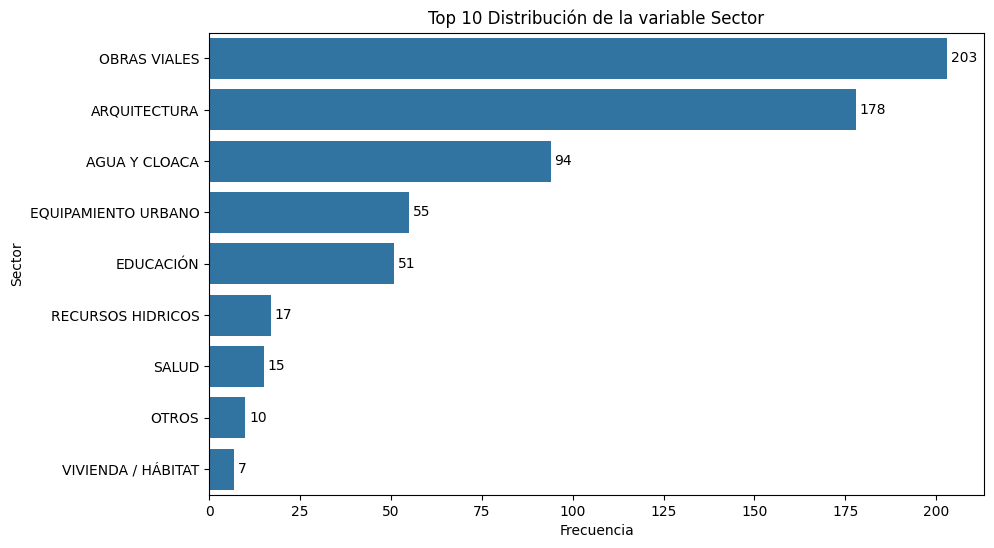

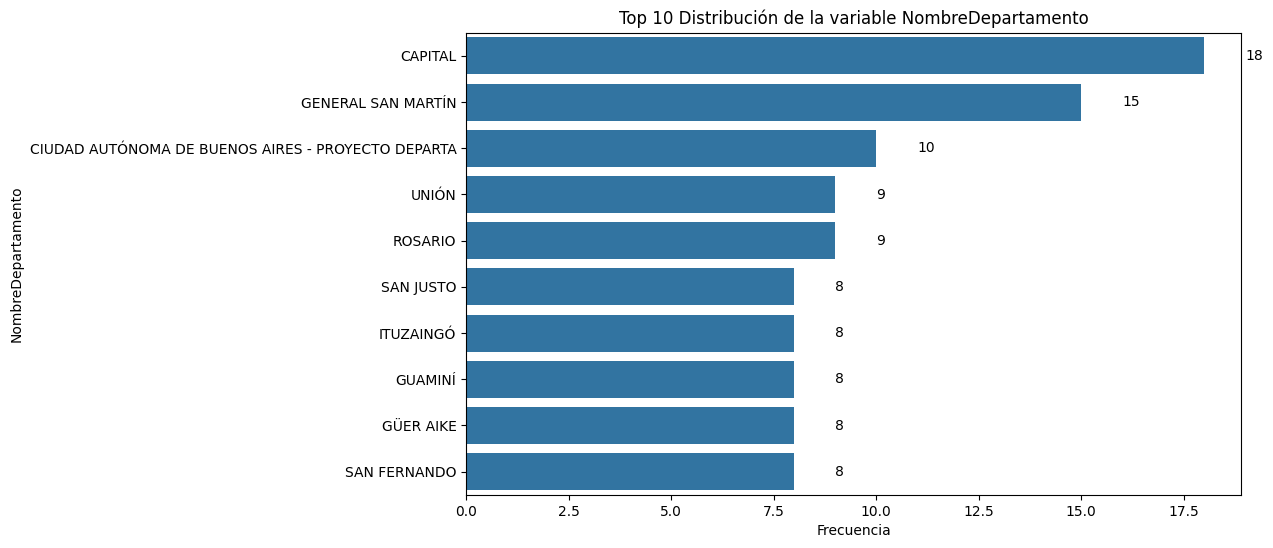

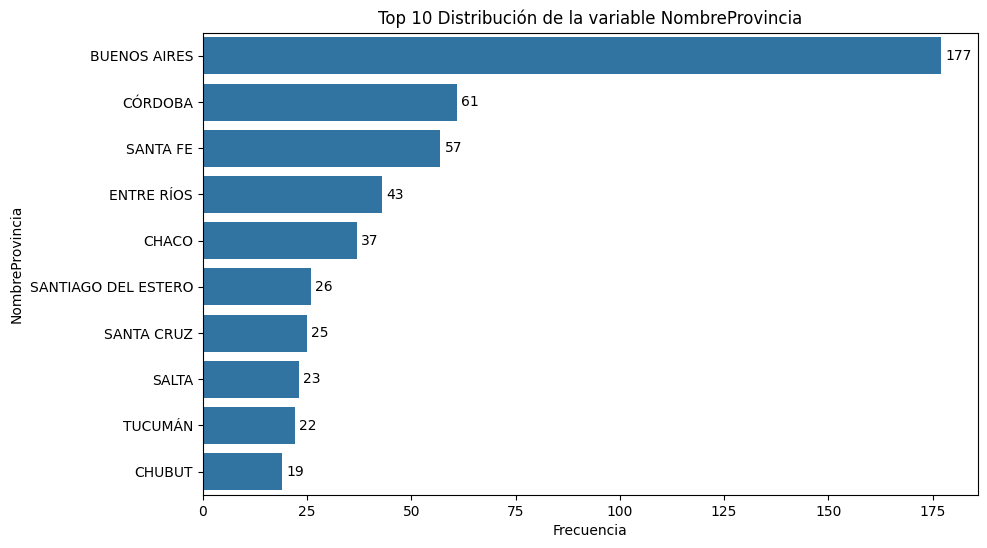

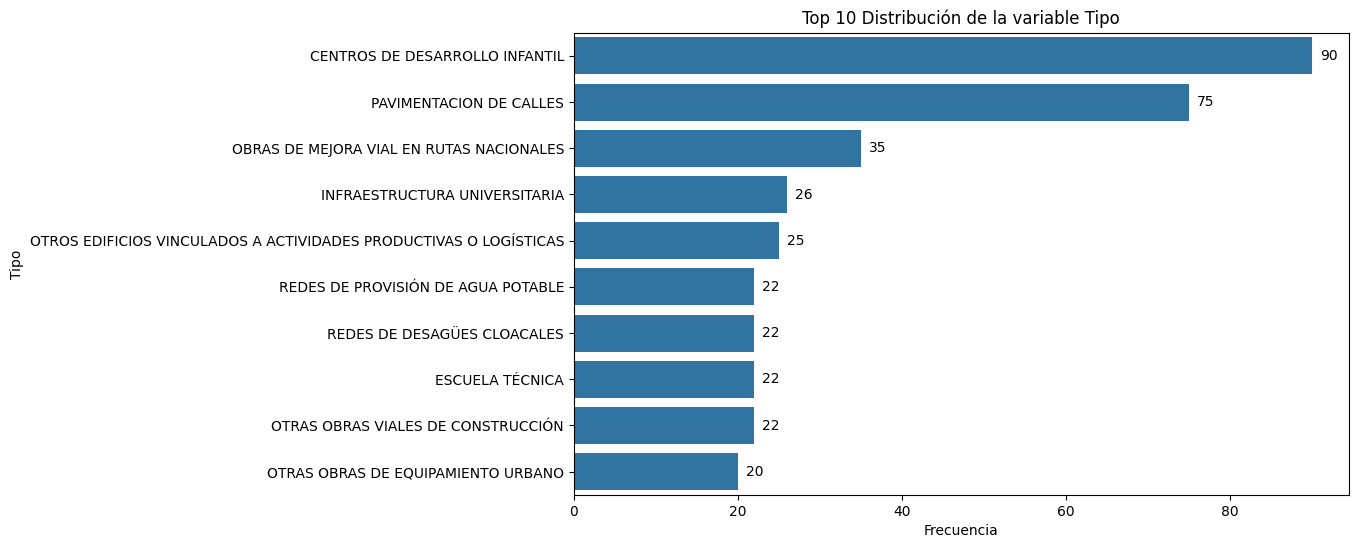

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

df_investment_projects_dis_cat = load_csv_from_url(url_investment_projects)

# Lista de variables categóricas que deseas analizar
categorical_columns = ['Sector', 'NombreDepartamento', 'NombreProvincia', 'Tipo']

# Crear un gráfico de barras para el top 10 de cada variable categórica
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    # Filtrar las 10 categorías más frecuentes y mostrar las opciones reales
    top_categories = df_investment_projects_dis_cat[column].value_counts().nlargest(10)
    ax = sns.countplot(data=df_investment_projects_dis_cat[df_investment_projects_dis_cat[column].isin(top_categories.index)],
                       y=column, order=top_categories.index)

    # Añadir etiquetas en las barras con las frecuencias
    for p in ax.patches:
        width = p.get_width()  # Ancho de la barra (es decir, el valor de frecuencia)
        plt.text(width + 1,    # Posición en el eje X (ligeramente desplazado hacia la derecha)
                 p.get_y() + p.get_height() / 2,  # Posición en el eje Y (centrado verticalmente en la barra)
                 int(width),  # El valor de frecuencia como entero
                 va='center')  # Alinear verticalmente la etiqueta en el centro de la barra

    plt.title(f'Top 10 Distribución de la variable {column}')
    plt.xlabel('Frecuencia')
    plt.ylabel(column)
    plt.show()


🔎 Conclusiones:

Sector:

*  Predominio de Obras Viales: "Obras Viales" es el sector más representado con 203 proyectos, seguido por "Arquitectura" con 178. Esto indica una fuerte concentración en infraestructuras viales y construcción arquitectónica.
Diversidad Moderada: Hay una dispersión considerable en otros sectores como "Agua y Cloaca" y "Equipamiento Urbano", que aunque tienen menos proyectos, representan áreas clave de inversión.

NombreDepartamento:

*  Concentración en "Capital": El departamento "Capital" lidera con 18 proyectos, seguido de "General San Martín" con 15. Esto sugiere un enfoque centralizado en estas áreas, posiblemente debido a su importancia política o económica.
Distribución Equilibrada: Otros departamentos como "Rosario" y "San Justo" tienen una representación más uniforme, lo que podría reflejar un esfuerzo por distribuir equitativamente los recursos a lo largo de diferentes regiones.

NombreProvincia:

*  Dominancia de Buenos Aires: La provincia de "Buenos Aires" sobresale con 177 proyectos, lo que resalta su importancia como un centro neurálgico de inversión.
Distribución Regional: Provincias como "Córdoba" y "Santa Fe" también muestran una representación significativa, lo que indica una inversión considerable en estas áreas, apoyando su desarrollo continuo.

Tipo de Proyecto:

*  Proyectos Sociales y Viales Predominantes: "Centros de Desarrollo Infantil" y "Pavimentación de Calles" son los tipos de proyectos más comunes, lo que sugiere una fuerte orientación hacia proyectos que mejoran la infraestructura social y vial.
*  Diversificación en Infraestructura: Otros tipos de proyectos como "Infraestructura Universitaria" y "Obras de Mejora Vial en Rutas Nacionales" también están bien representados, mostrando un enfoque en la mejora de infraestructura educativa y vial a nivel nacional.

###**<center>🤔¿Existen patrones o agrupaciones (clusters) en los datos con características similares?</center>**

In [158]:
df_investment_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IdProyecto          630 non-null    int64  
 1   CodigoBapin         630 non-null    int64  
 2   NombreProyecto      630 non-null    object 
 3   Sector              630 non-null    object 
 4   Subsector           630 non-null    object 
 5   Tipo                630 non-null    object 
 6   CostoEstimado       630 non-null    float64
 7   FechaEstimacion     630 non-null    object 
 8   Responsable         630 non-null    object 
 9   Plan                630 non-null    object 
 10  Objetivo            133 non-null    object 
 11  Descripcion         630 non-null    object 
 12  NombreProvincia     630 non-null    object 
 13  NombreDepartamento  630 non-null    object 
 14  FechaCargueArchivo  630 non-null    object 
 15  FuenteDatos         630 non-null    object 
 16  url_perf

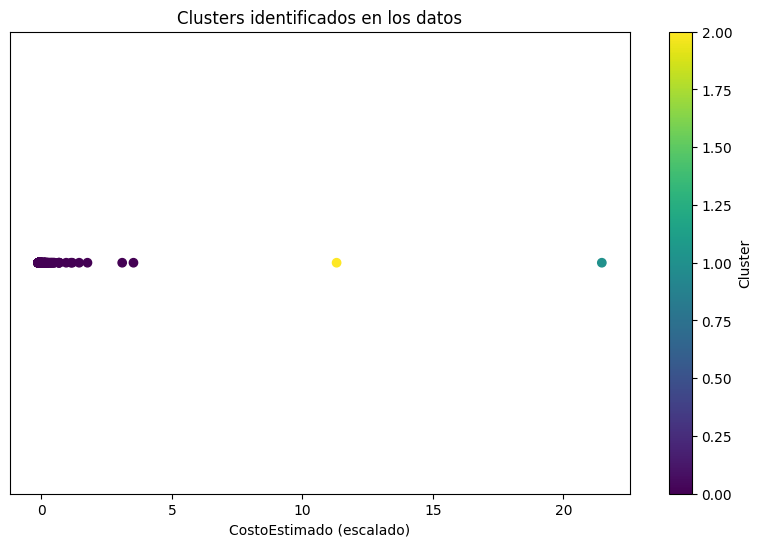

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar la característica numérica para el clustering
numeric_columns = ['CostoEstimado']
data_for_clustering = df_investment_projects[numeric_columns]

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Aplicar K-means con un número predefinido de clusters, por ejemplo, 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Añadir los clusters al DataFrame original
df_investment_projects['Cluster'] = clusters

# Visualizar los clusters (ya que solo hay una característica, la visualización será en 1D)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data, [0] * len(scaled_data), c=clusters, cmap='viridis', marker='o')
plt.xlabel('CostoEstimado (escalado)')
plt.title('Clusters identificados en los datos')
plt.yticks([])  # Oculta el eje y ya que no es relevante en esta visualización
plt.colorbar(label='Cluster')
plt.show()


🔎 Conclusiones:

*  Identificación de Clusters Distintos: El gráfico muestra que el algoritmo K-means ha identificado tres clusters distintos basados en la variable CostoEstimado. Estos clusters están bien separados, lo que indica que los proyectos se agrupan de manera clara en función de sus costos estimados.

*  Concentración de Proyectos con Costos Bajos: La mayoría de los proyectos se encuentran agrupados en el cluster 0, con costos estimados relativamente bajos. Esto sugiere que la mayoría de los proyectos en el conjunto de datos tienen un costo similar, probablemente en el rango bajo.

*  Proyectos Aislados con Costos Altos: Los clusters 1 y 2 contienen proyectos que se destacan significativamente por tener costos mucho más altos que los demás. Estos proyectos son mucho menos frecuentes, lo que podría indicar que son proyectos grandes y excepcionales dentro del conjunto de datos.

*  Distribución Sesgada: La distribución de los clusters sugiere una clara diferencia en el costo entre los proyectos más comunes y los proyectos más costosos, lo que podría ser relevante para la toma de decisiones financieras o la planificación de recursos.

*  Consideración para el Análisis Futuro: Dado que solo se utilizó una variable para el clustering (CostoEstimado), sería útil considerar otras variables, como el tipo de proyecto o la región geográfica, para realizar un análisis de clustering más robusto y entender mejor qué factores influyen en la agrupación de los proyectos.

##**Obras de la República Argentina (url_datos_espaciales)**

Contiene información de las Obras de la República Argentina

###**<center>🤔¿Cuáles son las estadísticas resumidas del conjunto de datos?</center>**

###**<center>🤔¿Hay valores faltantes en el conjunto de datos?</center>**

###**<center>🤔¿Se pueden identificar patrones de ausencia?</center>**

###**<center>🤔¿Hay valores atípicos en el conjunto de datos?</center>**

###**<center>🤔¿Cuál es la cardinalidad de las variables categóricas?</center>**

###**<center>🤔¿Existen distribuciones sesgadas en el conjunto de datos?</center>**

###**<center>🤔¿Necesitamos aplicar alguna transformación no lineal?</center>**

###**<center>🤔¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).</center>**

###**<center>🤔¿Hay correlación entre las variables dependientes e independientes?</center>**

###**<center>🤔¿Cómo se distribuyen los datos en función de diferentes categorías?</center>**

###**<center>🤔¿Existen patrones o agrupaciones (clusters) en los datos con características similares?</center>**